# Data Acquisition

In [1]:
import os
import shutil

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import librosa
import librosa.display

# !sudo apt-get install p7zip-full
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.instance().log.truncate=False
#from IPython.display import display, HTML
#display(HTML("<style>.output {max-height: 10000px; overflow: auto;}</style>"))

#import pandas as pd
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', None)  # or 199

## Definition of Control Variables

In [2]:
GDRIVE_DATA_DIR = "23-24_CE903-SU_team06/dataset/"

## Mount Google Drive

In [3]:
from google.colab import drive
contentPath = "/content/"
if not os.path.exists(contentPath + 'drive'):
  drive.mount( contentPath + 'drive')

Mounted at /content/drive


## Preprocessing

#### Old code

In [ ]:
def apply_framing(audio_df):
  def create_overlapping_frames(key, amp, label, sf, frame_size, hop_length):
    # Calculate the total number of frames
    if len(amp) == len(label):
      total_frames = 1 + int((len(amp) - frame_size) / hop_length)
      dic = {"key":[], "sf":[], "start":[], "end":[], "max_amp":[], "frame_index":[], "amp":[], "label":[]}

      # Create overlapping frames
      for i in range(total_frames):
        dic["key"].append(key)
        dic["sf"].append(sf)
        dic["start"].append(i * hop_length)
        dic["end"].append(i * hop_length + frame_size)
        dic["max_amp"].append(np.max(amp[i * hop_length: i * hop_length + frame_size]))
        dic["frame_index"].append(i)
        dic["amp"].append(amp[i * hop_length: i * hop_length + frame_size])
        frames_label_raw = label[i * hop_length: i * hop_length + frame_size]

        f_label = 0
        if np.sum(frames_label_raw==1) > (len(frames_label_raw) / 2):
          f_label = 1
        dic["label"].append(f_label)

      return dic
    else:
      print('Error: non matching amp and labels', key, len(amp), len(label))

  def create_and_label_frames(audio_df):
    return create_overlapping_frames(audio_df.name, audio_df["amp"], audio_df["label"],audio_df["sf"],frame_size, hop_length)

  all_frames = {}
  for frame_size in [256, 512, 1024, 2048]:
    hop_length = frame_size // 2

    frame_df = pd.DataFrame()
    #xx = audio_df.head(1).apply(create_and_label_frames, axis=1)
    xx = audio_df.apply(create_and_label_frames, axis=1)
    for x in xx:
      if len(frame_df) > 0:
        frame_df = pd.concat([frame_df, pd.DataFrame(x)], ignore_index=True)
      else:
        frame_df = pd.DataFrame(x)

    all_frames[frame_size] = frame_df
    print(f'Frame size {frame_size}, hop_length {hop_length}, count {len(frame_df)}')
  return all_frames


#### New code

In [11]:
csv_files = [f"/content/drive/My Drive/{GDRIVE_DATA_DIR}audio_data_300_before_framing_16Khz.feather"]

In [15]:
df_from_save = pd.read_feather(csv_files[0])
df_from_save['key'] = df_from_save['index']
df_from_save.drop(columns=['index'], inplace=True)
df_from_save.set_index('key', inplace=True)

feather.write_feather(df_from_save, 'audio_data.feather')

In [16]:
test = pd.read_feather('audio_data.feather')
print(test.head())

                                                                                    amp  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [2.4100282e-19, 4.552187e-20, -4.743169e-19, -...   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf  [-6.8415117e-12, -1.8763156e-11, -7.3362375e-1...   
45ba4f8d-bebb-4faa-9472-9dc113c24822  [7.0571576e-11, 1.2040582e-10, -2.156766e-12, ...   
230eb02a-14df-4430-9603-634552b985a3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                           amp_original  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

In [7]:
import pyarrow.feather as feather
import pandas as pd

# Assuming csv_files is a list of CSV file paths and you want to read the first one
df_from_save = pd.read_feather(csv_files[0])

# Create a new DataFrame with just the 'key' column
keys_df = df_from_save[['index']]

# Write the DataFrame with just the 'key' column to a Feather file
feather.write_feather(keys_df, 'audio_data.feather')

In [ ]:
import pyarrow.feather as feather
import pandas as pd

# Assuming csv_files is a list of CSV file paths and you want to read the first one
df_from_save = pd.read_feather(csv_files[0])

# Create a new DataFrame with just the 'key' column
keys_df = df_from_save[['index']]

# Write the DataFrame with just the 'key' column to a Feather file
feather.write_feather(keys_df, 'audio_data.feather')

Saving_grace = pd.read_feather('audio_data.feather')
print(df_from_save.head())

                                  index
0  6ba0829b-5840-480d-8db5-1ca39a95159a
1  9821da28-7655-4736-abf8-4c89582e407f
2  52104dfe-5da3-46d0-b3b9-14df1f73e3cf
3  45ba4f8d-bebb-4faa-9472-9dc113c24822
4  230eb02a-14df-4430-9603-634552b985a3


In [4]:
# Assuming csv_files is a list of CSV file paths and you want to read the first one
testing_1 = pd.read_feather('audio_data_zcr_3.feather')
print(testing_1.head())

ArrowInvalid: Not an Arrow file

In [5]:
testing_2 = pd.read_feather('audio_data_cleaned.feather')
print(testing_2.head())

                                  index  label
0  6ba0829b-5840-480d-8db5-1ca39a95159a      0
1  9821da28-7655-4736-abf8-4c89582e407f      1
2  52104dfe-5da3-46d0-b3b9-14df1f73e3cf      0
3  45ba4f8d-bebb-4faa-9472-9dc113c24822      0
4  230eb02a-14df-4430-9603-634552b985a3      0


In [ ]:
import pyarrow.feather as feather
import pandas as pd

# Assuming csv_files is a list of CSV file paths and you want to read the first one
df_from_save = pd.read_feather('audio_data_zcr_3.feather')

# Function to check if an array contains 1
def check_array(arr):
    if 1 in arr:
        return 1
    else:
        return 0

# Create a new column 'label_2' based on the condition
df_from_save['label_2'] = df_from_save['label'].apply(check_array)

# Write the updated DataFrame to a new Feather file
feather.write_feather(df_from_save, 'audio_data.feather')

# Read the updated Feather file
saving_grace = pd.read_feather('audio_data.feather')
print(saving_grace.head())

                                  index  \
0  6ba0829b-5840-480d-8db5-1ca39a95159a   
1  9821da28-7655-4736-abf8-4c89582e407f   
2  52104dfe-5da3-46d0-b3b9-14df1f73e3cf   
3  45ba4f8d-bebb-4faa-9472-9dc113c24822   
4  230eb02a-14df-4430-9603-634552b985a3   

                                                 amp  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [2.4100282e-19, 4.552187e-20, -4.743169e-19, -...   
2  [-6.8415117e-12, -1.8763156e-11, -7.3362375e-1...   
3  [7.0571576e-11, 1.2040582e-10, -2.156766e-12, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                        amp_original     sf  sf_original  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  16000        22050   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  16000        22050   
2  [-2.1058653e-13, 3.8422906e-12, 3.0886578e-12,...  16000        22050   
3  [3.3146007e-11, 1.01445345e-11, 7.24516e-11, -...  16000        22050   
4  [0.0, 0.0, 0.0, 0.0, 

In [ ]:
import pyarrow.feather as feather
import pandas as pd

# Read the Feather file
saving_grace = pd.read_feather('audio_data.feather')

# Drop all columns except 'index' and 'label_2'
saving_grace = saving_grace[['index', 'label_2']]

# Rename 'label_2' to 'label'
saving_grace = saving_grace.rename(columns={'label_2': 'label'})

# Write the updated DataFrame to a new Feather file
feather.write_feather(saving_grace, 'audio_data_cleaned.feather')

# Read the updated Feather file
cleaned_df = pd.read_feather('audio_data_cleaned.feather')
print(cleaned_df.head())

                                  index  label
0  6ba0829b-5840-480d-8db5-1ca39a95159a      0
1  9821da28-7655-4736-abf8-4c89582e407f      1
2  52104dfe-5da3-46d0-b3b9-14df1f73e3cf      0
3  45ba4f8d-bebb-4faa-9472-9dc113c24822      0
4  230eb02a-14df-4430-9603-634552b985a3      0


In [ ]:
cleaned_df['key'] = cleaned_df['index']
cleaned_df.drop(columns=['index'], inplace=True)
cleaned_df.set_index('key', inplace=True)
print(cleaned_df.head())

                                      label
key                                        
6ba0829b-5840-480d-8db5-1ca39a95159a      0
9821da28-7655-4736-abf8-4c89582e407f      1
52104dfe-5da3-46d0-b3b9-14df1f73e3cf      0
45ba4f8d-bebb-4faa-9472-9dc113c24822      0
230eb02a-14df-4430-9603-634552b985a3      0


In [ ]:
def extract_columns_by_key(df):
    # Read the original Feather file
    original_df = pd.read_feather('audio_data.feather')

    # Create a dictionary to store the extracted columns
    extracted_data = {}

    # Iterate over the unique keys in the cleaned DataFrame
    for key in df.index.unique():
        # Filter the original DataFrame by the current key
        filtered_df = original_df[original_df['index'] == key]

        # Extract the desired columns and store them in the dictionary
        extracted_data[key] = {
            'shape': filtered_df['shape'].values[0],
            'zcr_amp_total': filtered_df['zcr_amp_total'].values[0],
            'mcr_amp_total': filtered_df['mcr_amp_total'].values[0],
            'zcr_amp_ori_total': filtered_df['zcr_amp_ori_total'].values[0],
            'mcr_amp_ori_total': filtered_df['mcr_amp_ori_total'].values[0]
        }

    return extracted_data

KeyError: 'index'

In [ ]:
extracted_data = extract_columns_by_key(cleaned_df)

In [ ]:
cleaned_d2f = pd.read_feather('audio_data_zcr_3.feather')
# Function to count the number of elements in each list
def count_elements_in_list(row):
    return len(row['amp'])

# Apply the function to each row
cleaned_d2f['count_of_elements'] = cleaned_d2f.apply(count_elements_in_list, axis=1)

# Display the DataFrame with the count of elements in each list
print(cleaned_d2f)

                                                                                    amp  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [2.4100282e-19, 4.552187e-20, -4.743169e-19, -...   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf  [-6.8415117e-12, -1.8763156e-11, -7.3362375e-1...   
45ba4f8d-bebb-4faa-9472-9dc113c24822  [7.0571576e-11, 1.2040582e-10, -2.156766e-12, ...   
230eb02a-14df-4430-9603-634552b985a3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                                                 ...   
0b2f75d7-f116-4f35-ae4c-f2018eab2794  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7d4263a0-687a-4a88-a377-9c1dfd548377  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
86fde631-73a5-4113-bfe5-f2fbabf7bc31  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

In [ ]:
import pandas as pd
from uuid import uuid4

def unpack_arrays_in_row(df, row_index):
    """
    Unpacks arrays in a specific row and renames them uniquely.

    Parameters:
    - df: The DataFrame containing the row to unpack arrays from.
    - row_index: The index of the row to unpack arrays from.

    Returns:
    A tuple containing the modified DataFrame and a dictionary mapping original column names to new names.
    """
    modified_df = df.copy()
    name_mapping = {}

    for col in modified_df.columns:
        if isinstance(modified_df[col].iloc[row_index], list):  # Check if the column contains lists
            new_name = f"{col}_{uuid4().hex}"  # Generate a unique name for the column
            modified_df.rename(columns={col: new_name}, inplace=True)
            name_mapping[col] = new_name

    return modified_df, name_mapping

def save_modified_row_to_feather(modified_df, output_file_path):
    """
    Saves the modified row to a new Feather file.

    Parameters:
    - modified_df: The modified DataFrame to save.
    - output_file_path: Path to the output Feather file.
    """
    # Reset the index of the DataFrame to ensure compatibility with Feather format
    modified_df.reset_index(drop=True, inplace=True)
    modified_df.to_feather(output_file_path)

# Example usage
input_file_path = 'audio_data_zcr_3.feather'
output_file_path = 'audio_row0.feather'
row_index_to_process = 0  # Index of the row to process

# Load the Feather file
df = pd.read_feather(input_file_path)

# Unpack arrays in the selected row and rename them uniquely
modified_df, name_mapping = unpack_arrays_in_row(df, row_index_to_process)

# Save the modified row to a new Feather file
save_modified_row_to_feather(modified_df, output_file_path)

print("Modified row saved to:", output_file_path)



KeyboardInterrupt: 

In [23]:
input_file_path = 'audio_data_cleaned.feather'
df = pd.read_feather(input_file_path)
print(df.head(1))

                                  index  label
0  6ba0829b-5840-480d-8db5-1ca39a95159a      0


In [ ]:
input_file_path = 'audio_row0.feather'
df = pd.read_feather(input_file_path)
print(df.head(1))

                                                 amp  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                        amp_original     sf  sf_original  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  16000        22050   

      shape shape_original cough_start_end  \
0  [160086]       [220618]            None   

                                               label  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             zcr_amp  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06738281...   

                                         zcr_amp_ori  ...  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   

                                    skew_zcr_amp_ori  \
0  [2.034327607515516, 1.669853485410123, 1.12098...   

                                    kurt_zcr_amp_ori  \
0  [4.869716893374502, 1.4223195515135627, -0.108...   

                                  median_zcr_amp_ori  \
0  [0.0346

In [ ]:
from pyarrow.feather import feather
df_from_save = pd.read_feather(csv_files[0])
df_from_save['key'] = df_from_save['index']
df_from_save.drop(columns=['index'], inplace=True)
df_from_save.set_index('key', inplace=True)
df_from_save
feather.write_dataframe(df_from_save, 'audio_data.feather')

Calculate Zero-Cross-Rate
- amp
- amp_original

In [17]:
import numpy as np
import pandas as pd
import pyarrow.feather as feather
import librosa

def compute_zcr_librosa(frame):
    if isinstance(frame, np.ndarray) and frame.ndim > 0:
        zcr = librosa.feature.zero_crossing_rate(frame)[0]
    else:
        zcr = 0
    return zcr

# Load the DataFrame from the Feather file
df_from_save = pd.read_feather('audio_data.feather')

# Apply the function to your DataFrame columns
df_from_save['zcr_amp'] = df_from_save['amp'].apply(compute_zcr_librosa)
df_from_save['zcr_amp_ori'] = df_from_save['amp_original'].apply(compute_zcr_librosa)

# Save the updated DataFrame to a new Feather file
feather.write_feather(df_from_save, 'audio_data_cleaned.feather')

# Optionally, print a sample of the DataFrame
print(df_from_save.head(6))

                                                                                    amp  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [2.4100282e-19, 4.552187e-20, -4.743169e-19, -...   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf  [-6.8415117e-12, -1.8763156e-11, -7.3362375e-1...   
45ba4f8d-bebb-4faa-9472-9dc113c24822  [7.0571576e-11, 1.2040582e-10, -2.156766e-12, ...   
230eb02a-14df-4430-9603-634552b985a3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
f4eaf2ba-b2e3-4755-893e-6ddb786189c9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                           amp_original  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

In [18]:
import numpy as np
import pandas as pd
import pyarrow.feather as feather
import librosa
from scipy.stats import skew, kurtosis

def compute_zcr_librosa(frame):
    if isinstance(frame, np.ndarray) and frame.ndim > 0:
        zcr = librosa.feature.zero_crossing_rate(frame)[0]
    else:
        zcr = np.array([0])
    return zcr

def compute_higher_order_stats(zcr_values):
    mean_zcr = np.mean(zcr_values)
    var_zcr = np.var(zcr_values)
    std_zcr = np.std(zcr_values)
    skew_zcr = skew(zcr_values)
    kurt_zcr = kurtosis(zcr_values)
    median_zcr = np.median(zcr_values)

    # Calculate 1, 2, and 3 standard deviations from the mean
    zcr_1std = zcr_values[zcr_values <= mean_zcr + std_zcr]
    zcr_2std = zcr_values[(zcr_values <= mean_zcr + 2 * std_zcr) & (zcr_values > mean_zcr + std_zcr)]
    zcr_3std = zcr_values[(zcr_values <= mean_zcr + 3 * std_zcr) & (zcr_values > mean_zcr + 2 * std_zcr)]

    # Return the lengths of the subsets instead of the subsets themselves
    return mean_zcr, var_zcr, std_zcr, skew_zcr, kurt_zcr, median_zcr, len(zcr_1std), len(zcr_2std), len(zcr_3std)


def sliding_window_stats(zcr_values, window_size, hop_length):
    stats_list = []
    for start in range(0, len(zcr_values) - window_size + 1, hop_length):
        window = zcr_values[start:start + window_size]
        stats = compute_higher_order_stats(window)
        stats_list.append(stats)

    # Preallocate the array with a fixed size (assuming a maximum number of windows)
    max_windows = max(0, len(zcr_values) - window_size + 1)
    result_array = np.empty((max_windows, 9))  # 9 because there are 9 statistics returned
    for i, stats in enumerate(stats_list):
        # Assign the stats tuple to a row in the result_array
        result_array[i] = np.array(stats)  # Convert stats to a numpy array before assignment

    # If there are fewer windows than the preallocated size, fill the rest with NaN
    result_array[len(stats_list):] = np.nan

    return result_array

# Load the DataFrame from the Feather file
df_from_save = pd.read_feather('audio_data_zcr.feather')

# Parameters for sliding window
window_size = 100
hop_length = 50

# Apply the function to your DataFrame columns and compute higher-order stats
df_from_save['zcr_amp'] = df_from_save['amp'].apply(compute_zcr_librosa)
df_from_save['zcr_amp_ori'] = df_from_save['amp_original'].apply(compute_zcr_librosa)

# Compute sliding window statistics
zcr_amp_stats = df_from_save['zcr_amp'].apply(lambda x: sliding_window_stats(x, window_size, hop_length))
zcr_amp_ori_stats = df_from_save['zcr_amp_ori'].apply(lambda x: sliding_window_stats(x, window_size, hop_length))

# Extract statistics into separate columns, replace NaN with 0
df_from_save['mean_zcr_amp'] = zcr_amp_stats.apply(lambda x: x[:, 0] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['var_zcr_amp'] = zcr_amp_stats.apply(lambda x: x[:, 1] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['std_zcr_amp'] = zcr_amp_stats.apply(lambda x: x[:, 2] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['skew_zcr_amp'] = zcr_amp_stats.apply(lambda x: x[:, 3] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['kurt_zcr_amp'] = zcr_amp_stats.apply(lambda x: x[:, 4] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['median_zcr_amp'] = zcr_amp_stats.apply(lambda x: x[:, 5] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['zcr_amp_1std'] = zcr_amp_stats.apply(lambda x: x[:, 6] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['zcr_amp_2std'] = zcr_amp_stats.apply(lambda x: x[:, 7] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['zcr_amp_3std'] = zcr_amp_stats.apply(lambda x: x[:, 8] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))

df_from_save['mean_zcr_amp_ori'] = zcr_amp_ori_stats.apply(lambda x: x[:, 0] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['var_zcr_amp_ori'] = zcr_amp_ori_stats.apply(lambda x: x[:, 1] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['std_zcr_amp_ori'] = zcr_amp_ori_stats.apply(lambda x: x[:, 2] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['skew_zcr_amp_ori'] = zcr_amp_ori_stats.apply(lambda x: x[:, 3] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['kurt_zcr_amp_ori'] = zcr_amp_ori_stats.apply(lambda x: x[:, 4] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['median_zcr_amp_ori'] = zcr_amp_ori_stats.apply(lambda x: x[:, 5] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['zcr_amp_ori_1std'] = zcr_amp_ori_stats.apply(lambda x: x[:, 6] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['zcr_amp_ori_2std'] = zcr_amp_ori_stats.apply(lambda x: x[:, 7] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))
df_from_save['zcr_amp_ori_3std'] = zcr_amp_ori_stats.apply(lambda x: x[:, 8] if len(x) > 0 else np.zeros(1)).apply(lambda x: np.nan_to_num(x, nan=0.0))

# Save the updated DataFrame to a new Feather file
feather.write_feather(df_from_save, 'audio_data_zcr_2.feather')

# Optionally, print a sample of the DataFrame
print(df_from_save.head(6))

                                                                                    amp  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [2.4100282e-19, 4.552187e-20, -4.743169e-19, -...   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf  [-6.8415117e-12, -1.8763156e-11, -7.3362375e-1...   
45ba4f8d-bebb-4faa-9472-9dc113c24822  [7.0571576e-11, 1.2040582e-10, -2.156766e-12, ...   
230eb02a-14df-4430-9603-634552b985a3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
f4eaf2ba-b2e3-4755-893e-6ddb786189c9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                           amp_original  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

In [39]:
import numpy as np
import pandas as pd
import pyarrow.feather as feather

def compute_zcr(frame):
    if isinstance(frame, np.ndarray) and frame.ndim > 0:
        sign_changes = np.diff(np.signbit(frame))
        zcr = np.sum(sign_changes != 0)
        mcr = zcr / len(frame)  # Compute MCR
    else:
        zcr = 0
        mcr = 0
    return zcr, mcr  # Return both ZCR and MCR

# Load the DataFrame from the Feather file
df_from_save = pd.read_feather('audio_data_zcr_2.feather')

# Apply the function to your DataFrame columns
df_from_save[['zcr_amp_total', 'mcr_amp_total']] = df_from_save['amp'].apply(compute_zcr).to_list()
df_from_save[['zcr_amp_ori_total', 'mcr_amp_ori_total']] = df_from_save['amp_original'].apply(compute_zcr).to_list()

# Save the updated DataFrame to a new Feather file
feather.write_feather(df_from_save, 'audio_data_cleaned_3.feather')

# Optionally, print a sample of the DataFrame and the calculated values
print(df_from_save.head(10))

                                                                                    amp  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [2.4100282e-19, 4.552187e-20, -4.743169e-19, -...   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf  [-6.8415117e-12, -1.8763156e-11, -7.3362375e-1...   
45ba4f8d-bebb-4faa-9472-9dc113c24822  [7.0571576e-11, 1.2040582e-10, -2.156766e-12, ...   
230eb02a-14df-4430-9603-634552b985a3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
f4eaf2ba-b2e3-4755-893e-6ddb786189c9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3d4a9cc4-3488-4e1c-a05e-d86c091a05e5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
008c1c9e-aeef-40c5-846c-24f1b964f884  [-1.0437457e-11, 8.703788e-12, 7.298934e-12, -...   
70ea9638-f7e3-4f16-bb97-7d066a0e6cdf  [1.7262924e-18, 8.801093e-20, -2.9877412e-18, ...   

In [44]:
import pyarrow.feather as feather
import pandas as pd

# Read the Feather file
fixed_df = pd.read_feather('audio_data_zcr_3.feather')

def mark_label(row):
    if np.sum(row) > 5:
        return 1
    elif np.sum(row) == 0:
        return 0
    else:
        return row

fixed_df['label'] = fixed_df['label'].apply(mark_label)

# Drop all columns except 'index' and 'label_2'
fixed_df = saving_grace[['label','zcr_amp_total','mcr_amp_total','zcr_amp_ori_total','mcr_amp_ori_total']]

# Rename 'label_2' to 'label'
fixed_df = saving_grace.rename(columns={'label_2': 'label'})

# Write the updated DataFrame to a new Feather file
feather.write_feather(fixed_df, 'audio_data_fixed_2.feather')

# Read the updated Feather file
fixed_df = pd.read_feather('audio_data_fixed_2.feather')
print(fixed_df.head())

                                                                                  label  \
key                                                                                       
6ba0829b-5840-480d-8db5-1ca39a95159a  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
9821da28-7655-4736-abf8-4c89582e407f  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
45ba4f8d-bebb-4faa-9472-9dc113c24822  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
230eb02a-14df-4430-9603-634552b985a3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                      zcr_amp_total  mcr_amp_total  \
key                                                                  
6ba0829b-5840-480d-8db5-1ca39a95159a        25154.0       0.157128   
9821da28-7655-4736-abf8-4c89582e407f        69947.0       0.452556   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf        10169.0       0.341700   
45ba4f8d-beb

In [46]:
import pyarrow.feather as feather
import pandas as pd

def mark_label(row):
    if np.sum(row) > 5:
        return 1
    elif np.sum(row) == 0:
        return 0
    else:
        return row

fixed_df['label'] = fixed_df['label'].apply(mark_label)

# Rename 'label_2' to 'label'
fixed_df = fixed_df.rename(columns={'label_2': 'label'})

# Write the updated DataFrame to a new Feather file
feather.write_feather(fixed_df, 'audio_data_fixed_2.feather')

# Read the updated Feather file
fixed_df = pd.read_feather('audio_data_fixed_2.feather')
print(fixed_df.head())

                                      label  zcr_amp_total  mcr_amp_total  \
key                                                                         
6ba0829b-5840-480d-8db5-1ca39a95159a      0        25154.0       0.157128   
9821da28-7655-4736-abf8-4c89582e407f      1        69947.0       0.452556   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf      0        10169.0       0.341700   
45ba4f8d-bebb-4faa-9472-9dc113c24822      0        20598.0       0.130831   
230eb02a-14df-4430-9603-634552b985a3      0        20000.0       0.126263   

                                      zcr_amp_ori_total  mcr_amp_ori_total  
key                                                                         
6ba0829b-5840-480d-8db5-1ca39a95159a            29212.0           0.132410  
9821da28-7655-4736-abf8-4c89582e407f            94813.0           0.445125  
52104dfe-5da3-46d0-b3b9-14df1f73e3cf            10693.0           0.260722  
45ba4f8d-bebb-4faa-9472-9dc113c24822            21232.0           0.097856 

In [47]:
input_file_path = 'audio_data_fixed_2.feather'
df = pd.read_feather(input_file_path)
print(df.head())

                                      label  zcr_amp_total  mcr_amp_total  \
key                                                                         
6ba0829b-5840-480d-8db5-1ca39a95159a      0        25154.0       0.157128   
9821da28-7655-4736-abf8-4c89582e407f      1        69947.0       0.452556   
52104dfe-5da3-46d0-b3b9-14df1f73e3cf      0        10169.0       0.341700   
45ba4f8d-bebb-4faa-9472-9dc113c24822      0        20598.0       0.130831   
230eb02a-14df-4430-9603-634552b985a3      0        20000.0       0.126263   

                                      zcr_amp_ori_total  mcr_amp_ori_total  
key                                                                         
6ba0829b-5840-480d-8db5-1ca39a95159a            29212.0           0.132410  
9821da28-7655-4736-abf8-4c89582e407f            94813.0           0.445125  
52104dfe-5da3-46d0-b3b9-14df1f73e3cf            10693.0           0.260722  
45ba4f8d-bebb-4faa-9472-9dc113c24822            21232.0           0.097856 

# TESTING

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pickle

# Load the data
data = pd.read_feather('audio_data_fixed_2.feather')

# Separate features and labels
X = data.drop(['label'], axis=1)
y = data['label']

# Random Forest with 5-fold cross-validation
rf = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_validate(rf, X, y, cv=kfold, scoring=['accuracy', 'precision', 'recall', 'f1'])

print('Random Forest 5-fold CV:')
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    print(f'{metric.capitalize()}: {np.mean(rf_scores["test_" + metric]):.4f} (+/- {np.std(rf_scores["test_" + metric]):.4f})')

# LSTM with 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def lstm_cv_score(X, y, fold):
    train_idx, val_idx = list(kfold.split(X))[fold]
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    input_size = X_train_tensor.size(-1)
    hidden_size = 64
    output_size = 2
    model = LSTMClassifier(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 100
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.numpy())
            y_true.extend(labels.numpy())

    val_acc = accuracy_score(y_true, y_pred)
    val_prec = precision_score(y_true, y_pred)
    val_rec = recall_score(y_true, y_pred)
    val_f1 = f1_score(y_true, y_pred)
    val_conf_mat = confusion_matrix(y_true, y_pred)
    return val_acc, val_prec, val_rec, val_f1, val_conf_mat

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x.view(x.size(0), 1, -1))
        out = self.fc(out[:, -1, :])
        return out

lstm_scores = [lstm_cv_score(X, y, fold) for fold in range(5)]
lstm_metrics = np.array([score[:4] for score in lstm_scores])
lstm_conf_mats = [score[-1] for score in lstm_scores]

print('\nLSTM 5-fold CV:')
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
    print(f'{metric.capitalize()}: {lstm_metrics[:, i].mean():.4f} (+/- {lstm_metrics[:, i].std():.4f})')

print('\nConfusion Matrices for Each Fold:')
for i, conf_mat in enumerate(lstm_conf_mats):
    print(f'Fold {i+1}:\n{conf_mat}\n')

# Save the trained models
with open('ZCR_RF_LSTM.pkl', 'wb') as f:
    pickle.dump({'rf': rf, 'lstm': LSTMClassifier(lstm_metrics[0, 0].astype(int), 64, 2)}, f)

Random Forest 5-fold CV:
Accuracy: 0.6633 (+/- 0.0452)
Precision: 0.6622 (+/- 0.0508)
Recall: 0.6758 (+/- 0.0889)
F1: 0.6631 (+/- 0.0386)

LSTM 5-fold CV:
Accuracy: 0.4733 (+/- 0.0620)
Precision: 0.4357 (+/- 0.2479)
Recall: 0.5227 (+/- 0.4071)
F1: 0.4075 (+/- 0.2238)

Confusion Matrices for Each Fold:
Fold 1:
[[ 0 34]
 [ 0 26]]

Fold 2:
[[22  6]
 [24  8]]

Fold 3:
[[25  2]
 [33  0]]

Fold 4:
[[23  4]
 [21 12]]

Fold 5:
[[ 1 34]
 [ 0 25]]



# Below is old

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pyarrow.feather as feather

# Load the feather file
file_path = 'audio_data_zcr_3.feather'
df = pd.read_feather(file_path)

# Identify columns with arrays
array_columns = {}
for column in df.columns:
    if isinstance(df[column].iloc[0], np.ndarray):
        array_columns[column] = df[column].apply(lambda x: x.shape).iloc[0]

print("Array columns and their shapes:", array_columns)

# Function to summarize array columns
def summarize_array_column(df, column_name):
    summary_df = pd.DataFrame()
    summary_df[f'{column_name}_mean'] = df[column_name].apply(np.mean)
    summary_df[f'{column_name}_std'] = df[column_name].apply(np.std)
    summary_df[f'{column_name}_min'] = df[column_name].apply(np.min)
    summary_df[f'{column_name}_max'] = df[column_name].apply(np.max)
    return summary_df

# Summarize array columns
summary_dfs = [summarize_array_column(df, col) for col in array_columns]
df_summary = pd.concat(summary_dfs, axis=1)

# Combine the summarized array columns with the rest of the dataframe
non_array_columns = df.drop(columns=array_columns.keys())
df_combined = pd.concat([non_array_columns.reset_index(drop=True), df_summary.reset_index(drop=True)], axis=1)

# Ensure the target column is included
if 'label' not in df_combined.columns:
    raise ValueError("Target column 'label' not found. Please check the column names.")

# Separate features and target
X = df_combined.drop(columns=['label'])
y = df_combined['label']

# Identify column types
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create and train the Random Forest model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")


Array columns and their shapes: {'amp': (160086,), 'amp_original': (220618,), 'shape': (1,), 'shape_original': (1,), 'label': (160086,), 'zcr_amp': (313,), 'zcr_amp_ori': (431,), 'mean_zcr_amp': (214,), 'var_zcr_amp': (214,), 'std_zcr_amp': (214,), 'skew_zcr_amp': (214,), 'kurt_zcr_amp': (214,), 'median_zcr_amp': (214,), 'zcr_amp_1std': (214,), 'zcr_amp_2std': (214,), 'zcr_amp_3std': (214,), 'mean_zcr_amp_ori': (332,), 'var_zcr_amp_ori': (332,), 'std_zcr_amp_ori': (332,), 'skew_zcr_amp_ori': (332,), 'kurt_zcr_amp_ori': (332,), 'median_zcr_amp_ori': (332,), 'zcr_amp_ori_1std': (332,), 'zcr_amp_ori_2std': (332,), 'zcr_amp_ori_3std': (332,)}


ValueError: Target column 'label' not found. Please check the column names.

### Unpack the columns that are arrays



In [ ]:
import dask.dataframe as dd
import pandas as pd
import pyarrow as pa
import pyarrow.feather as feather
import numpy as np
import tables
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the Feather file into a Dask DataFrame
input_file = 'audio_data_zcr_3.feather'
try:
    df = pd.read_feather(input_file)  # Read using Pandas
    ddf = dd.from_pandas(df, npartitions=4)  # Convert to Dask DataFrame
except Exception as e:
    logging.error(f"Error reading Feather file: {e}")
    raise

# Function to process a partition
def process_partition(partition):
    # Identify columns with array-like data types
    array_columns = partition.columns[partition.dtypes == object]
    # Explode each column identified as having array-like data
    for column in array_columns:
        partition = partition.explode(column)
    return partition

# Process the data in parallel using Dask
processed_ddf = ddf.map_partitions(process_partition, meta=ddf._meta)

# Create an Apache Arrow IPC stream (using a byte buffer)
sink = pa.BufferOutputStream()

# Convert the processed Dask DataFrame to an Apache Arrow Table
try:
    table = pa.Table.from_pandas(processed_ddf.compute())  # Convert to Arrow Table

    # Write the Table to the stream using RecordBatchStreamWriter
    with pa.ipc.RecordBatchStreamWriter(sink, table.schema) as writer:
        for batch in table.to_batches():
            writer.write_batch(batch)

except Exception as e:
    logging.error(f"Error converting to Apache Arrow IPC stream: {e}")
    raise

# Function to convert Apache Arrow data to PyTables dataset
def pyarrow_to_pytables(h5file, data, where):
    for col in data.columns:
        try:
            arr = data[col].to_numpy()
            atom = tables.Atom.from_dtype(arr.dtype)
            ds = h5file.create_carray(where, col, atom, arr.shape)
            ds[:] = arr
        except Exception as e:
            logging.error(f"Error converting column '{col}' to PyTables dataset: {e}")
            continue

# Read the Apache Arrow IPC stream into a PyTables dataset
output_file = 'zcr_FE.h5'
with tables.open_file(output_file, mode='w') as h5file:
    try:
        reader = pa.ipc.open_stream(sink.getvalue())
        data = reader.read_all()
        pyarrow_to_pytables(h5file, data, '/')
    except Exception as e:
        logging.error(f"Error writing to PyTables dataset: {e}")
        raise

logging.info("Conversion completed successfully.")

Streaming output truncated to the last 5000 lines.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

# OLD Below

In [ ]:
for col in df_from_save.columns:
    print(col)

amp
amp_original
sf
sf_original
shape
shape_original
cough_start_end
label
zcr_amp
zcr_amp_ori
mean_zcr_amp
var_zcr_amp
std_zcr_amp
skew_zcr_amp
kurt_zcr_amp
median_zcr_amp
zcr_amp_1std
zcr_amp_2std
zcr_amp_3std
mean_zcr_amp_ori
var_zcr_amp_ori
std_zcr_amp_ori
skew_zcr_amp_ori
kurt_zcr_amp_ori
median_zcr_amp_ori
zcr_amp_ori_1std
zcr_amp_ori_2std
zcr_amp_ori_3std
zcr_amp_total
mcr_amp_total
zcr_amp_ori_total
mcr_amp_ori_total


In [ ]:
import pandas as pd
import pyarrow.feather as feather

df_from_save = feather.read_feather('audio_data_zcr_3.feather')

# Assuming df_from_save is your DataFrame
for col in df_from_save.columns:
    # Check the type of the column
    if pd.api.types.is_numeric_dtype(df_from_save[col]):
        # Numeric columns are Series, so we get the shape by checking the length
        print(f"Column: {col}, Shape: {df_from_save[col].shape}")
    elif pd.api.types.is_object_dtype(df_from_save[col]):
        # Object columns (like strings) are also Series
        print(f"Column: {col}, Shape: {df_from_save[col].shape}")
    elif pd.api.types.is_categorical_dtype(df_from_save[col]):
        # Categorical columns are Series
        print(f"Column: {col}, Shape: {df_from_save[col].shape}")
    elif pd.api.types.is_datetime64_dtype(df_from_save[col]):
        # Datetime columns are Series
        print(f"Column: {col}, Shape: {df_from_save[col].shape}")
    elif pd.api.types.is_bool_dtype(df_from_save[col]):
        # Boolean columns are Series
        print(f"Column: {col}, Shape: {df_from_save[col].shape}")
    else:
        # Handle other data types if necessary
        print(f"Column: {col}, Shape: Unknown data type")

Column: amp, Shape: (300,)
Column: amp_original, Shape: (300,)
Column: sf, Shape: (300,)
Column: sf_original, Shape: (300,)
Column: shape, Shape: (300,)
Column: shape_original, Shape: (300,)
Column: cough_start_end, Shape: (300,)
Column: label, Shape: (300,)
Column: zcr_amp, Shape: (300,)
Column: zcr_amp_ori, Shape: (300,)
Column: mean_zcr_amp, Shape: (300,)
Column: var_zcr_amp, Shape: (300,)
Column: std_zcr_amp, Shape: (300,)
Column: skew_zcr_amp, Shape: (300,)
Column: kurt_zcr_amp, Shape: (300,)
Column: median_zcr_amp, Shape: (300,)
Column: zcr_amp_1std, Shape: (300,)
Column: zcr_amp_2std, Shape: (300,)
Column: zcr_amp_3std, Shape: (300,)
Column: mean_zcr_amp_ori, Shape: (300,)
Column: var_zcr_amp_ori, Shape: (300,)
Column: std_zcr_amp_ori, Shape: (300,)
Column: skew_zcr_amp_ori, Shape: (300,)
Column: kurt_zcr_amp_ori, Shape: (300,)
Column: median_zcr_amp_ori, Shape: (300,)
Column: zcr_amp_ori_1std, Shape: (300,)
Column: zcr_amp_ori_2std, Shape: (300,)
Column: zcr_amp_ori_3std, Shape

In [ ]:
import numpy as np
import pandas as pd

def apply_framing(audio_df):
    def create_overlapping_frames(key, amp, label, sf, frame_size, hop_length):
        # Initialize the dictionary with keys for all expected columns
        dic = {
            "key": [],
            "sf": [],
            "start": [],
            "end": [],
            "max_amp": [],
            "frame_index": [],
            "amp": [],
            "label": [],
            "amp_original": [],
            "sf_original": [],
            "shape": [],
            "shape_original": [],
            "cough_start_end": [],
            "zcr_amp": [],
            "zcr_amp_ori": [],
            "mean_zcr_amp": [],
            "var_zcr_amp": [],
            "std_zcr_amp": [],
            "skew_zcr_amp": [],
            "kurt_zcr_amp": [],
            "median_zcr_amp": [],
            "zcr_amp_1std": [],
            "zcr_amp_2std": [],
            "zcr_amp_3std": [],
            "mean_zcr_amp_ori": [],
            "var_zcr_amp_ori": [],
            "std_zcr_amp_ori": [],
            "skew_zcr_amp_ori": [],
            "kurt_zcr_amp_ori": [],
            "median_zcr_amp_ori": [],
            "zcr_amp_ori_1std": [],
            "zcr_amp_ori_2std": [],
            "zcr_amp_ori_3std": [],
            "zcr_amp_total": [],
            "mcr_amp_total": [],
            "zcr_amp_ori_total": [],
            "mcr_amp_ori_total": []
        }

        # Calculate the total number of frames
        if len(amp) == len(label):
            total_frames = 1 + int((len(amp) - frame_size) / hop_length)

            # Create overlapping frames
            for i in range(total_frames):
                start = i * hop_length
                end = start + frame_size
                if end > len(amp):
                    end = len(amp)

                dic["key"].append(key)
                dic["sf"].append(sf)
                dic["start"].append(start)
                dic["end"].append(end)
                dic["max_amp"].append(np.max(amp[start:end]))
                dic["frame_index"].append(i)
                dic["amp"].append(amp[start:end])
                frames_label_raw = label[start:end]

                f_label = 0
                if np.sum(frames_label_raw == 1) > (len(frames_label_raw) / 2):
                    f_label = 1
                dic["label"].append(f_label)

            # After populating dic, find the maximum length among all arrays
            max_len = max(len(v) for v in dic.values() if isinstance(v, list))

            # Iterate through each item in dic and pad arrays to match max_len
            for key, value in dic.items():
                if isinstance(value, list):  # Check if the value is a list/array
                    # Pad the array with zeros to match max_len
                    # Convert value to numpy array for padding, then back to list
                    dic[key] = np.pad(value, (0, max_len - len(value)), mode='constant').tolist()

            return dic
        else:
            print('Error: non-matching amp and labels', key, len(amp), len(label))

    def create_and_label_frames_generator(row):
        # Extract necessary fields from the row
        key = row.name
        amp = row['amp']
        label = row['label']
        sf = row['sf']
        # Apply the create_overlapping_frames function
        return create_overlapping_frames(key, amp, label, sf, frame_size, hop_length)

    all_frames = {}
    for frame_size in [256, 512, 1024, 2048]:
        hop_length = frame_size // 2

        # Create an empty list to store dictionaries
        frame_dicts = []

        # Use the generator function to create frames on-the-fly
        frame_generator = audio_df.apply(create_and_label_frames_generator, axis=1)

        # Initialize an empty DataFrame
        frame_df = pd.DataFrame()

        # Iterate over the generator and save frames to a feather file in chunks
        chunk_size = 1000  # Adjust this value as needed
        for i, frame_dict in enumerate(frame_generator):
            # Append the frame dictionary to the list
            frame_dicts.append(frame_dict)

            # If the list reaches the chunk_size, convert it to a DataFrame and save to a feather file
            if (i + 1) % chunk_size == 0:
                chunk_df = pd.DataFrame(frame_dicts)
                chunk_filename = f'frames_{frame_size}_{i // chunk_size}.feather'
                chunk_df.to_feather(chunk_filename)
                print(f'Saved chunk {i // chunk_size} to {chunk_filename}')
                frame_dicts = []  # Reset the list

        # Save the remaining frames (if any) to a feather file
        if frame_dicts:
            chunk_df = pd.DataFrame(frame_dicts)
            chunk_filename = f'frames_{frame_size}_{i // chunk_size + 1}.feather'
            chunk_df.to_feather(chunk_filename)
            print(f'Saved chunk {i // chunk_size + 1} to {chunk_filename}')

        print(f'Frame size {frame_size}, hop_length {hop_length}, total frames {i + 1}')

    return all_frames

In [ ]:
def apply_framing(audio_df):
  def create_overlapping_frames(key, amp, label, sf, frame_size, hop_length):
    # Calculate the total number of frames
    if len(amp) == len(label):
      total_frames = 1 + int((len(amp) - frame_size) / hop_length)
      dic = {"key":[], "sf":[], "start":[],
             "end":[], "max_amp":[], "frame_index":[], "amp":[], "label":[]}

      # Create overlapping frames
      for i in range(total_frames):
        dic["key"].append(key)
        dic["sf"].append(sf)
        dic["start"].append(i * hop_length)
        dic["end"].append(i * hop_length + frame_size)
        dic["max_amp"].append(np.max(amp[i * hop_length: i * hop_length + frame_size]))
        dic["frame_index"].append(i)
        dic["amp"].append(amp[i * hop_length: i * hop_length + frame_size])
        frames_label_raw = label[i * hop_length: i * hop_length + frame_size]

        f_label = 0
        if np.sum(frames_label_raw==1) > (len(frames_label_raw) / 2):
          f_label = 1
        dic["label"].append(f_label)

      return dic
    else:
      print('Error: non matching amp and labels', key, len(amp), len(label))

  def create_and_label_frames(audio_df):
    return create_overlapping_frames(audio_df.name, audio_df["amp"], audio_df["label"],audio_df["sf"],frame_size, hop_length)

  all_frames = {}
  for frame_size in [256, 512, 1024, 2048]:
    hop_length = frame_size // 2

    frame_df = pd.DataFrame()
    #xx = audio_df.head(1).apply(create_and_label_frames, axis=1)
    xx = audio_df.apply(create_and_label_frames, axis=1)
    for x in xx:
      if len(frame_df) > 0:
        frame_df = pd.concat([frame_df, pd.DataFrame(x)], ignore_index=True)
      else:
        frame_df = pd.DataFrame(x)

    all_frames[frame_size] = frame_df
    print(f'Frame size {frame_size}, hop_length {hop_length}, count {len(frame_df)}')
  return all_frames


In [ ]:

# Define the frame sizes and hop lengths
frame_sizes = [256, 512, 1024, 2048]
hop_lengths = [fs // 2 for fs in frame_sizes]

# Apply the framing function
all_frames = apply_framing(df_from_save)

# Function to extract 'key' and 'label' from each dataframe and concatenate
def extract_and_concat(all_frames):
    result_df = pd.DataFrame()
    for frame_size, frame_df in all_frames.items():
        # Select only 'key' and 'label' columns
        selected_df = frame_df[['key', 'label']]
        if result_df.empty:
            result_df = selected_df
        else:
            result_df = pd.concat([result_df, selected_df], ignore_index=True)
    return result_df

# Extract and concatenate the dataframes
final_df = extract_and_concat(all_frames)

# Save the final dataframe to a feather file
final_df.to_feather('ZCR_rearange.feather')

Frame size 256, hop_length 128, count 333215
Frame size 512, hop_length 256, count 166399
Frame size 1024, hop_length 512, count 82957
Frame size 2048, hop_length 1024, count 41222


KeyError: "['label_collected'] not in index"

In [ ]:
final_df

,key,label
0,6ba0829b-5840-480d-8db5-1ca39a95159a,0
1,6ba0829b-5840-480d-8db5-1ca39a95159a,0
2,6ba0829b-5840-480d-8db5-1ca39a95159a,0
3,6ba0829b-5840-480d-8db5-1ca39a95159a,0
4,6ba0829b-5840-480d-8db5-1ca39a95159a,0
...,...,...
623788,49cc8b94-838b-4b23-9fb1-8d9384520634,0
623789,49cc8b94-838b-4b23-9fb1-8d9384520634,0
623790,49cc8b94-838b-4b23-9fb1-8d9384520634,0
623791,49cc8b94-838b-4b23-9fb1-8d9384520634,0


In [ ]:
# Read the feather file
df_from_feather = pd.read_feather('ZCR_rearange.feather')

# Display a sample of 10 rows
print(df_from_feather.sample(10))
print(df_from_feather.shape)

                                         key  label
396531  94cefab8-6d46-41c3-908e-59553106ad03      0
209501  ba17a577-b9d0-42b1-905f-b5960f4e655d      0
558812  620ded24-220f-4ada-b032-2b5c170b279a      0
168531  1601f875-3ce7-4dd7-9cbe-281935f0520c      0
388217  44f52b0c-c7f2-45fd-844a-1123930e9c90      0
253218  9333c624-ef59-44f6-9643-fa9b2485c173      0
4277    230eb02a-14df-4430-9603-634552b985a3      0
504836  bae0c88f-852c-4f3f-8141-d037c777459e      0
185467  493632f2-537a-4a36-a932-268a8aa59486      0
356519  30da8ef4-c905-4df0-a0a6-a7f232bfc9bf      0
(623793, 2)


In [ ]:
import pyarrow.feather as feather
#df_from_save1 = feather.read_feather('audio_data_zcr_4.feather')
all_frames_from_save = apply_framing(audio_df=df_from_save)

Frame size 256, hop_length 128, count 333215
Frame size 512, hop_length 256, count 166399
Frame size 1024, hop_length 512, count 82957
Frame size 2048, hop_length 1024, count 41222


In [ ]:
print(all_frames_from_save[256].head(5))

Empty DataFrame
Columns: []
Index: []


In [ ]:
for col in all_frames_from_save[256].columns:
    print(col)

key
sf
start
end
max_amp
frame_index
amp
label


#### New Code

In [ ]:
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

def create_overlapping_frames(key, amp, label, sf, frame_size, hop_length):
    # Calculate the total number of frames
    if len(amp) == len(label):
        total_frames = 1 + int((len(amp) - frame_size) / hop_length)
        dic = {
            "key": [], "sf": [], "start": [], "end": [], "max_amp": [],
            "frame_index": [], "amp": [], "label": []
        }

        # Create overlapping frames
        for i in range(total_frames):
            start_idx = i * hop_length
            end_idx = start_idx + frame_size
            frame_amp = amp[start_idx:end_idx]
            frame_label = label[start_idx:end_idx]

            dic["key"].append(key)
            dic["sf"].append(sf)
            dic["start"].append(start_idx)
            dic["end"].append(end_idx)
            dic["max_amp"].append(np.max(frame_amp))
            dic["frame_index"].append(i)
            dic["amp"].append(frame_amp)

            # Determine the frame label
            f_label = 1 if np.sum(frame_label == 1) > (len(frame_label) / 2) else 0
            dic["label"].append(f_label)

        return dic
    else:
        print('Error: non matching amp and labels', key, len(amp), len(label))
        return None

def create_and_label_frames(row, frame_size, hop_length):
    key = row.name
    amp = row["amp"]
    amp_original = row["amp_original"]
    label = row["label"]
    sf = row["sf"]
    sf_original = row["sf_original"]
    shape = row["shape"]
    shape_original = row["shape_original"]
    cough_start_end = row["cough_start_end"]

    # Dynamically extract all other columns
    other_columns = {col: row[col] for col in row.index if col not in ["amp", "amp_original", "label", "sf", "shape", "shape_original", "cough_start_end"]}

    # Calculate the total number of frames
    if len(amp) == len(label):
        total_frames = 1 + int((len(amp) - frame_size) / hop_length)
        frames = []

        # Create overlapping frames
        for i in range(total_frames):
            start_idx = i * hop_length
            end_idx = start_idx + frame_size
            frame_amp = amp[start_idx:end_idx]
            frame_label = label[start_idx:end_idx]

            # Determine the frame label
            f_label = 1 if np.sum(frame_label == 1) > (len(frame_label) / 2) else 0

            frame_data = {
                "key": key,
                "sf": sf,
                "start": start_idx,
                "end": end_idx,
                "max_amp": np.max(frame_amp),
                "frame_index": i,
                "amp": frame_amp,
                "label": f_label,
                "amp_original": amp_original[start_idx:end_idx],
                "sf_original": sf_original,
                "shape": shape,
                "shape_original": shape_original,
                "cough_start_end": cough_start_end
            }

            # Add other columns to the frame data
            frame_data.update({col: (other_columns[col][start_idx:end_idx] if isinstance(other_columns[col], (list, np.ndarray)) and col not in ["amp", "amp_original", "label", "sf", "shape", "shape_original", "cough_start_end"] else other_columns[col]) for col in other_columns})

            frames.append(frame_data)

        return pd.DataFrame(frames)
    else:
        print('Error: non matching amp and labels', key, len(amp), len(label))
        return pd.DataFrame()


def extract_info(audio_df):
    info = {}
    for _, row in audio_df.iterrows():
        key = row.name
        info[key] = {
            "amp": row["amp"],
            "amp_original": row["amp_original"],
            "label": row["label"],
            "sf": row["sf"]
        }
    return info

def apply_framing(audio_df):
    all_frames = {}
    frame_sizes = [256, 512, 1024, 2048]

    info = extract_info(audio_df)

    with ProcessPoolExecutor() as executor:
        for frame_size in frame_sizes:
            hop_length = frame_size // 2
            frame_df = pd.DataFrame()

            # Use parallel processing to create frames
            futures = [executor.submit(create_and_label_frames, row, frame_size, hop_length) for _, row in audio_df.iterrows()]
            results = [future.result() for future in futures]

            for result in results:
                if not result.empty:  # Check if the DataFrame is not empty
                    frame_df = pd.concat([frame_df, result], ignore_index=True)

            all_frames[frame_size] = frame_df
            print(f'Frame size {frame_size}, hop_length {hop_length}, count {len(frame_df)}')

    return all_frames

# Load the feather file
audio_df = pd.read_feather('audio_data_zcr_3.feather')

# Apply the framing function
all_frames = apply_framing(audio_df)

# Save the resulting frames as a new feather file
for frame_size, frame_df in all_frames.items():
    filename = f'Zero_Cross_Rate_Features_frames_{frame_size}.feather'
    frame_df.reset_index(drop=True, inplace=True)
    frame_df.to_feather(filename)
    print(f'Saved frames with size {frame_size} to {filename}')

TypeError: 'int' object is not subscriptable

In [ ]:
import pyarrow.feather as feather

# Load the feather files back into DataFrames
frame_sizes = [256, 512, 1024, 2048]
combined_frames = {}

for frame_size in frame_sizes:
    filename = f'Zero_Cross_Rate_Features_frames_{frame_size}.feather'
    frame_df = feather.read_feather(filename)
    combined_frames[frame_size] = frame_df

# Optionally, concatenate all DataFrames into one and save to a single Feather file
concatenated_df = pd.concat(combined_frames.values(), keys=combined_frames.keys())
concatenated_df.to_feather('combined_frames.feather')

# Now `combined_frames` is a dictionary with four DataFrames, one for each frame size
# And `concatenated_df` is a single DataFrame containing all the data from the four frame sizes

# Access data by frame size
grouped_by_size = concatenated_df.groupby(level=0)

# Example of accessing data for a specific frame size
frame_size_256 = grouped_by_size.get_group(256)

FileNotFoundError: [Errno 2] Failed to open local file 'Zero_Cross_Rate_Features_frames_256.feather'. Detail: [errno 2] No such file or directory

In [ ]:
print('frame size 2048 df',all_frames[2048].iloc[1:8])

frame size 2048 df                                     key     sf  start   end       max_amp  \
1  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   1024  3072  0.000000e+00   
2  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   2048  4096  3.078310e-16   
3  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   3072  5120  1.724941e-02   
4  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   4096  6144  1.724941e-02   
5  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   5120  7168  1.016226e-02   
6  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   6144  8192  6.138158e-03   
7  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   7168  9216  5.402887e-03   

   frame_index                                                amp  label  
1            1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0  
2            2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0  
3            3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0  
4            4  [-1.9449276e-17, -1.0387967e-16, -6.678394e-17..

### Test to Validate Reading the Saved File

### Test to Create Frames and Labels from the Saved File Data

In [ ]:
all_frames_from_save = apply_framing(audio_df='/content/audio_data_zcr_2.feather')
#print('frame size 256 df',all_frames_from_save[256].iloc[1:2])
#print('frame size 512 df',all_frames_from_save[512].iloc[1:2])
#print('frame size 1024 df',all_frames_from_save[1024].iloc[1:2])
print('frame size 2048 df',all_frames_from_save[2048].iloc[1:8])

AttributeError: 'str' object has no attribute 'iterrows'

In [ ]:
df_frame_from_save_256 = all_frames_from_save[256]
df_filtered = df_frame_from_save_256[df_frame_from_save_256['label'] == 1]
print(df_filtered.head(9))

                                       key     sf  start    end   max_amp  \
1521  9821da28-7655-4736-abf8-4c89582e407f  16000  34816  35072  0.002695   
1522  9821da28-7655-4736-abf8-4c89582e407f  16000  34944  35200  0.065178   
1523  9821da28-7655-4736-abf8-4c89582e407f  16000  35072  35328  0.695883   
1524  9821da28-7655-4736-abf8-4c89582e407f  16000  35200  35456  0.780107   
1525  9821da28-7655-4736-abf8-4c89582e407f  16000  35328  35584  0.780107   
1526  9821da28-7655-4736-abf8-4c89582e407f  16000  35456  35712  0.742853   
1527  9821da28-7655-4736-abf8-4c89582e407f  16000  35584  35840  0.742853   
1528  9821da28-7655-4736-abf8-4c89582e407f  16000  35712  35968  0.611974   
1529  9821da28-7655-4736-abf8-4c89582e407f  16000  35840  36096  0.611974   

      frame_index                                                amp  label  
1521          272  [3.6848618e-05, 4.6366677e-05, 4.947109e-05, 0...      1  
1522          273  [-0.00077894254, -0.0005220729, -0.0003376844,...     

Mean Zero-Crossing Rate
Median Zero-Crossing Rate
ZCR Variance
ZCR Percentiles (e.g., 25th, 75th)
Normalized ZCR
Weighted ZCR
Recent and Emerging Features:
Multi-Resolution ZCR: Calculating ZCR at different time-scales or window sizes to capture both local and global signal characteristics.
Adaptive Thresholding ZCR: Using adaptive thresholds instead of a fixed zero level to account for noise or signal variations.
Spectral ZCR: Applying the ZCR concept to the spectral domain, such as calculating the zero-crossings of the spectral coefficients or residual signals.
Differential ZCR: Calculating the difference between consecutive ZCR values to capture temporal dynamics.
ZCR Entropy: Measuring the entropy or randomness of the ZCR distribution, which can be useful for distinguishing different signal types.
ZCR Ratios: Computing ratios or differences between ZCR values of different signal components or frequency bands.
ZCR Derivatives: Using higher-order derivatives of the ZCR to capture more complex signal characteristics.
ZCR Clustering: Applying clustering algorithms to ZCR values

Frame size 256, hop_length 128, count 333215
Frame size 512, hop_length 256, count 166399
Frame size 1024, hop_length 512, count 82957
Frame size 2048, hop_length 1024, count 41222
frame size 2048 df                                     key     sf  start   end       max_amp  \
1  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   1024  3072  0.000000e+00   
2  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   2048  4096  3.078310e-16   
3  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   3072  5120  1.724941e-02   
4  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   4096  6144  1.724941e-02   
5  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   5120  7168  1.016226e-02   
6  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   6144  8192  6.138158e-03   
7  6ba0829b-5840-480d-8db5-1ca39a95159a  16000   7168  9216  5.402887e-03   

   frame_index                                                amp   zcr_amp  \
1            1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.000000   
2            2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.070591   
3            3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.202003   
4            4  [-1.9449276e-17, -1.0387967e-16, -6.678394e-17...  0.132389   
5            5  [0.008292509, 0.0078917, 0.007787101, 0.006938...  0.054226   
6            6  [0.0017611326, 0.0013758485, 0.0004708674, 0.0...  0.116756   
7            7  [0.00017506334, 0.00046936778, 0.00020028581, ...  0.119687   

   zcr_orig_amp  label  
1      0.000000      0  
2      0.000000      0  
3      0.000000      0  
4      0.034441      0  
5      0.087689      0  
6      0.054226      0  
7      0.023449      0  

In [ ]:
print('frame size 256 df',all_frames_from_save[256].iloc[1:2])
print('frame size 512 df',all_frames_from_save[512].iloc[1:2])
print('frame size 1024 df',all_frames_from_save[1024].iloc[1:2])
print('frame size 2048 df',all_frames_from_save[2048].iloc[1:2])

frame size 256 df                                     key     sf  start  end  max_amp  \
1  6ba0829b-5840-480d-8db5-1ca39a95159a  16000    128  384      0.0   

   frame_index  \
1            1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         amp  \
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

# Old

In [ ]:
df_frame_from_save_256[['key','max_amp']].iloc[6:9]

,key,max_amp
6,6ba0829b-5840-480d-8db5-1ca39a95159a,0.0
7,6ba0829b-5840-480d-8db5-1ca39a95159a,0.0
8,6ba0829b-5840-480d-8db5-1ca39a95159a,0.0


In [ ]:
df_frame_from_save_256 = all_frames_from_save[256]
print(df_frame_from_save_256.shape)
df_frame_from_save_512 = all_frames_from_save[512]
print(df_frame_from_save_512.shape)
df_frame_from_save_1024 = all_frames_from_save[1024]
print(df_frame_from_save_512.shape)
df_frame_from_save_2048 = all_frames_from_save[2048]
print(df_frame_from_save_512.shape)


(333215, 8)
(166399, 8)
(166399, 8)
(166399, 8)


In [ ]:
print(type(all_frames_from_save))
for i in all_frames_from_save:
  print(i)

<class 'dict'>
256
512
1024
2048


Feature Extraction: Zero-Cross-Rate


# Optimization

In [ ]:
import numpy as np
import pandas as pd
import librosa
from tqdm.auto import tqdm
import time

def enhanced_zcr_features(frame_df):
    # Identify the column containing frame amplitudes
    amp_columns = [col for col in frame_df.columns if 'amp' in col.lower() and frame_df[col].apply(lambda x: isinstance(x, (list, np.ndarray))).all()]

    if not amp_columns:
        raise ValueError("No suitable column found containing frame amplitude data. Ensure one column has 'amp' in its name and contains lists or arrays.")

    amp_column = amp_columns[0]
    if len(amp_columns) > 1:
        print(f"Warning: Multiple amplitude columns found {amp_columns}. Using '{amp_column}'.")

    def zcr_features(frame):
        if isinstance(frame, list):
            frame = np.array(frame)

        zero_crossings = librosa.zero_crossings(frame, pad=False)
        count = np.sum(zero_crossings)
        rate = count / len(frame)

        zero_indices = np.where(zero_crossings)[0]
        avg_speed = np.mean(np.abs(frame[zero_indices[1:]] - frame[zero_indices[:-1]])) if len(zero_indices) > 1 else 0

        std_dist = np.std(np.diff(zero_indices)) if len(zero_indices) > 1 else 0
        percentiles = np.percentile(np.diff(zero_indices), [25, 50, 75]) if len(zero_indices) > 1 else [0, 0, 0]

        return {
            'zcr': rate,
            'zc_count': count,
            'zc_speed': avg_speed,
            'zc_regularity': std_dist,
            'zc_perc_25': percentiles[0],
            'zc_perc_50': percentiles[1],
            'zc_perc_75': percentiles[2]
        }

    zcr_results = frame_df[amp_column].apply(lambda x: zcr_features(x)).tolist()
    zcr_df = pd.DataFrame(zcr_results)
    final_df = pd.concat([frame_df.reset_index(drop=True), zcr_df], axis=1)

    return final_df, amp_column

def check_and_replace_columns(df, frame_size, base_features):
    print("Searching DataFrame for duplicates...")
    duplicate_columns = []

    for feature in base_features:
        column_name = f"{feature}_{frame_size}"
        if column_name in df.columns:
            duplicate_columns.append(column_name)

    if duplicate_columns:
        print(f"Replacing duplicates with fresh columns: {', '.join(duplicate_columns)}")
        df.drop(columns=duplicate_columns, inplace=True)
    else:
        print("No duplicates found.")

    rename_dict = {feature: f"{feature}_{frame_size}" for feature in base_features}
    df.rename(columns=rename_dict, inplace=True)

    # Ensure all expected columns are present
    for perc in [25, 50, 75]:
        col_name = f'zc_perc_{perc}_{frame_size}'
        if col_name not in df.columns:
            df[col_name] = 0
            print(f"Added missing column {col_name} with default value 0")

    return df

def find_all_duplicates(all_frames):
    all_duplicates = {}
    for frame_size, df in all_frames.items():
        duplicates = [col for col in df.columns if df.columns.tolist().count(col) > 1]
        if duplicates:
            all_duplicates[frame_size] = list(set(duplicates))  # Use set to get unique duplicates
    return all_duplicates

def process_frames(data_source, base_features, progress_bar=True):
    if isinstance(data_source, dict):
        frame_sizes = list(data_source.keys())
        if progress_bar:
            frame_sizes = tqdm(frame_sizes, desc="Processing frame sizes")

        for frame_size in frame_sizes:
            start_time = time.time()

            df = data_source[frame_size].copy()
            df, amp_column = enhanced_zcr_features(df)

            df = check_and_replace_columns(df, frame_size, base_features)

            data_source[frame_size] = df

            end_time = time.time()
            print(f"Calculated enhanced ZCR features for frame size {frame_size} in {end_time - start_time:.2f} seconds")
            print(f"Using '{amp_column}' as the amplitude data source.")

            # Display a sample of 5 rows from the DataFrame
            print(f"\nColumns in DataFrame for frame size {frame_size}:")
            print(df.columns)
            print("\nSample of 5 rows:")
            display_cols = [col for col in df.columns if 'amp' not in col.lower() or not isinstance(df[col][0], (list, np.ndarray))]
            print(df[display_cols].sample(5))
            print("-" * 50)

        # Final check for any remaining duplicates across all DataFrames
        remaining_duplicates = find_all_duplicates(data_source)
        if remaining_duplicates:
            print("\nWarning: Some duplicate columns still exist:")
            for frame_size, duplicates in remaining_duplicates.items():
                print(f"  Frame size {frame_size}: {', '.join(duplicates)}")
            print("Consider joining these columns if they are similar.")
        else:
            print("\nNo duplicate columns found.")

    elif isinstance(data_source, pd.DataFrame):
        start_time = time.time()

        df, amp_column = enhanced_zcr_features(data_source)

        df = check_and_replace_columns(df, 'single', base_features)

        end_time = time.time()
        print(f"Calculated enhanced ZCR features for single frame in {end_time - start_time:.2f} seconds")
        print(f"Using '{amp_column}' as the amplitude data source.")

        # Display a sample of 5 rows from the DataFrame
        print(f"\nColumns in DataFrame:")
        print(df.columns)
        print("\nSample of 5 rows:")
        display_cols = [col for col in df.columns if 'amp' not in col.lower() or not isinstance(df[col][0], (list, np.ndarray))]
        print(df[display_cols].head(5))
        print("-" * 50)

    else:
        print("Invalid data source. Please provide a dictionary of dataframes or a single dataframe.")
    return df


base_features = ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_25', 'zc_perc_50', 'zc_perc_75']
process_frames(all_frames_from_save, base_features)

Processing frame sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Searching DataFrame for duplicates...
Replacing duplicates with fresh columns: zcr_256, zc_count_256, zc_speed_256, zc_regularity_256, zc_perc_25_256, zc_perc_50_256, zc_perc_75_256
Calculated enhanced ZCR features for frame size 256 in 89.23 seconds
Using 'amp' as the amplitude data source.

Columns in DataFrame for frame size 256:
Index(['key', 'sf', 'start', 'end', 'max_amp', 'frame_index', 'amp', 'label',
       'zcr_256', 'zc_count_256', 'zc_speed_256', 'zc_regularity_256',
       'zc_perc_25_256', 'zc_perc_50_256', 'zc_perc_75_256'],
      dtype='object')

Sample of 5 rows:
                                         key     sf  start    end   max_amp  \
36936   98d7734d-5522-40da-9f04-b349f9a32916  16000  22528  22784  0.001759   
95194   75f40f5c-7b0e-4ab3-8065-f343732e14b9  16000  23552  23808  0.008980   
165793  71c1a6f1-cf65-485a-9257-6294d823e7ba  16000  91904  92160  0.000141   
269197  58c09ef8-9773-4aed-a47a-847520861441  16000  78848  79104  0.046860   
34237   c1371e45-8

In [ ]:
type(all_frames_from_save)
for i in all_frames_from_save:
    print([i])





[256]
[512]
[1024]
[2048]

Columns in DataFrame:


NameError: name 'df' is not defined

# Below is for making graphs and animations

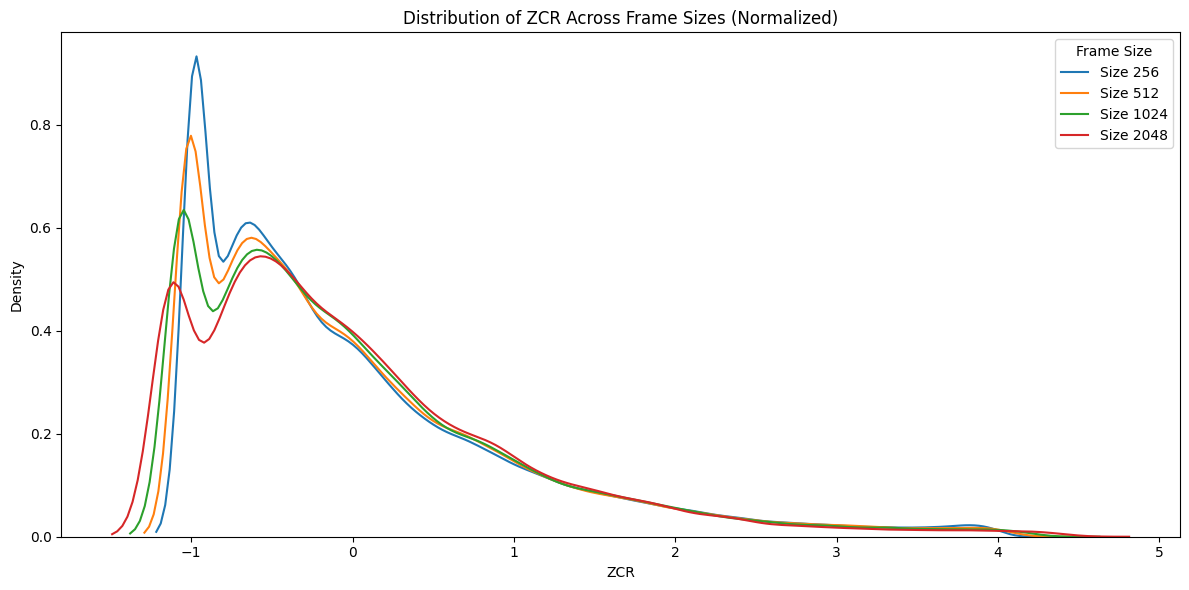

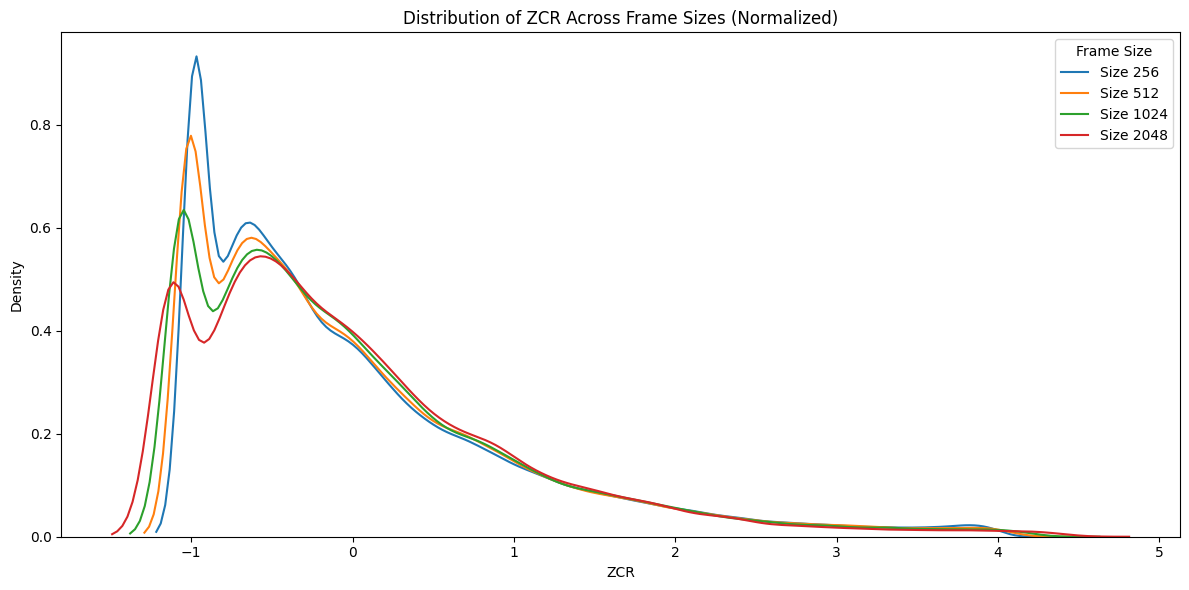

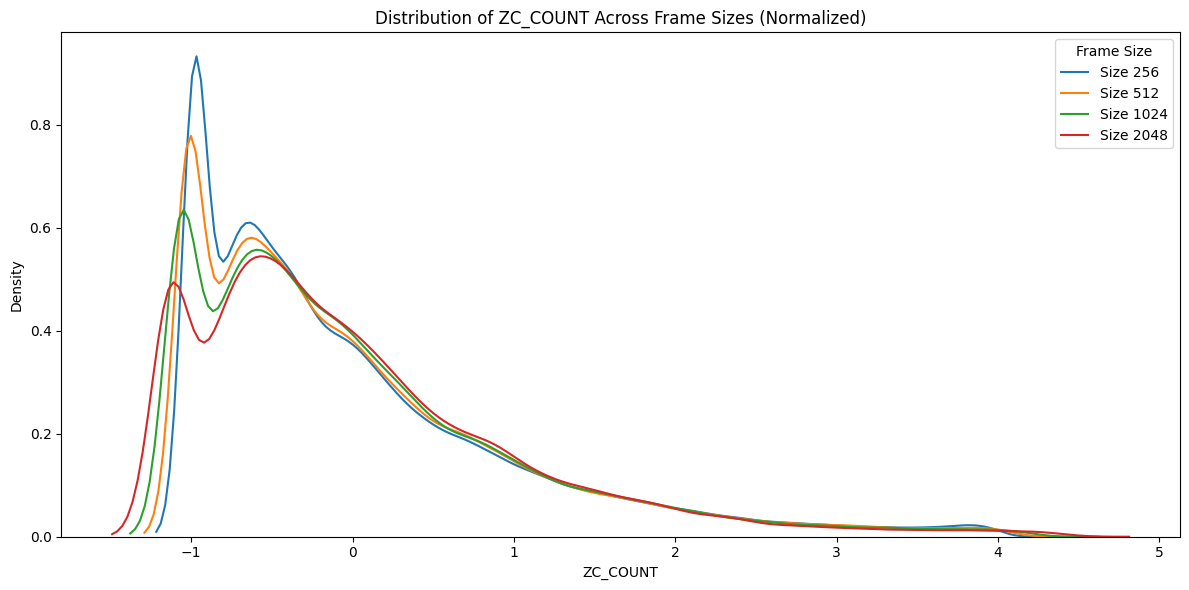

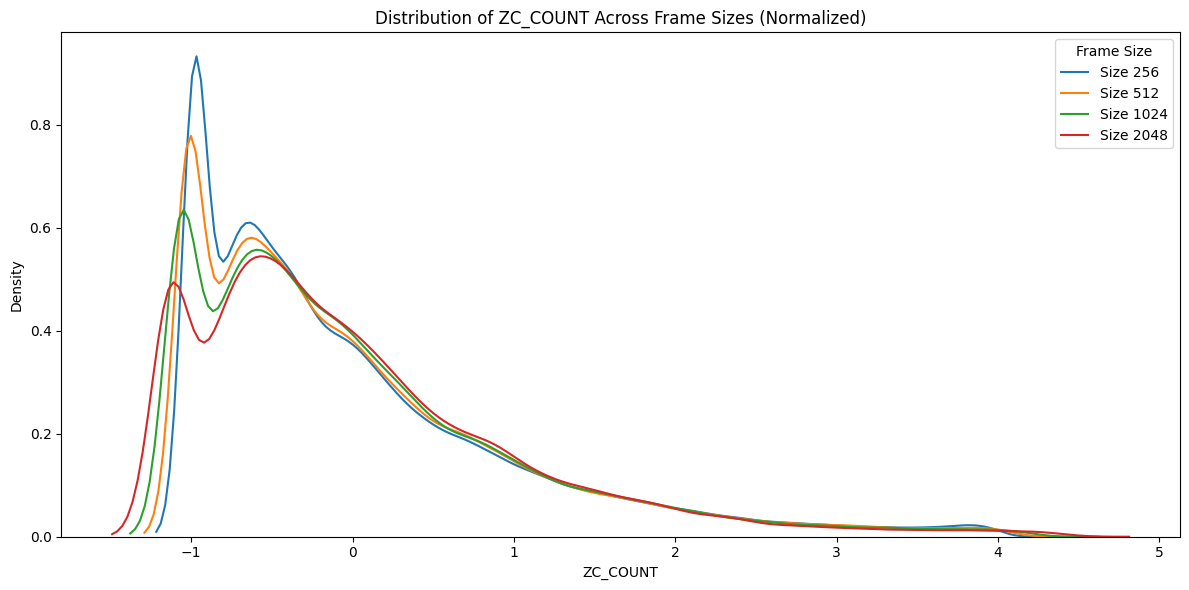

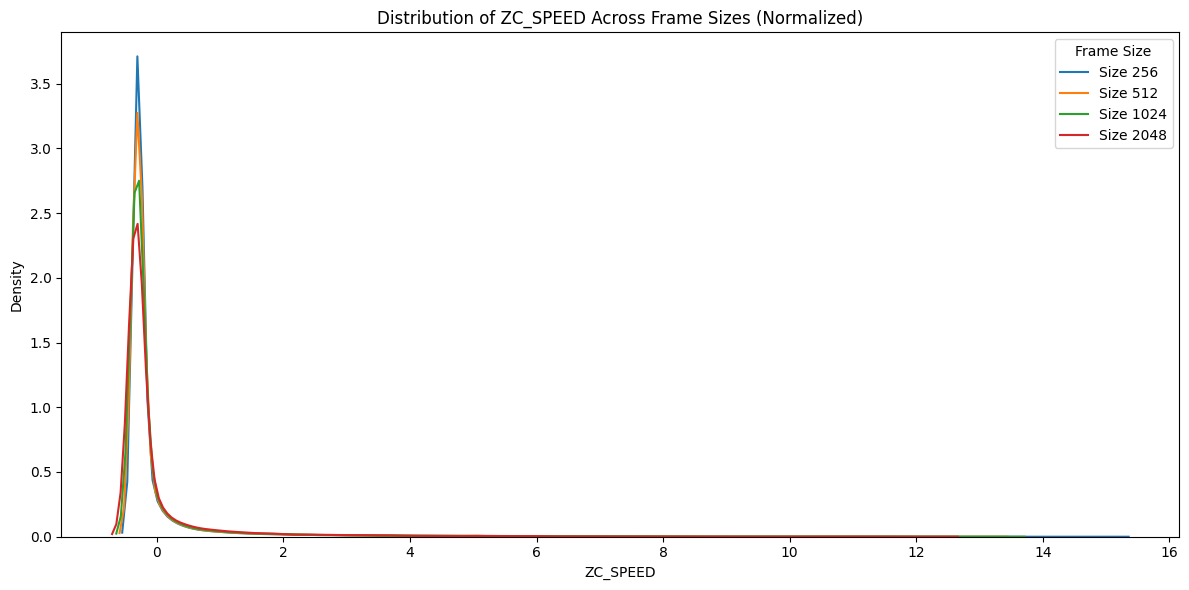

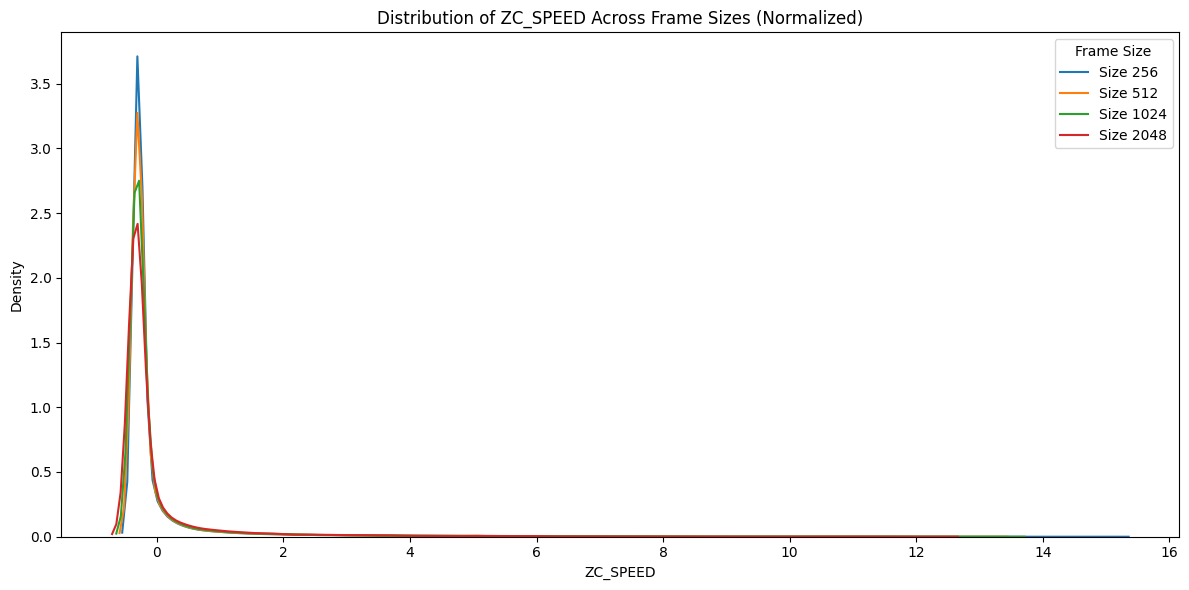

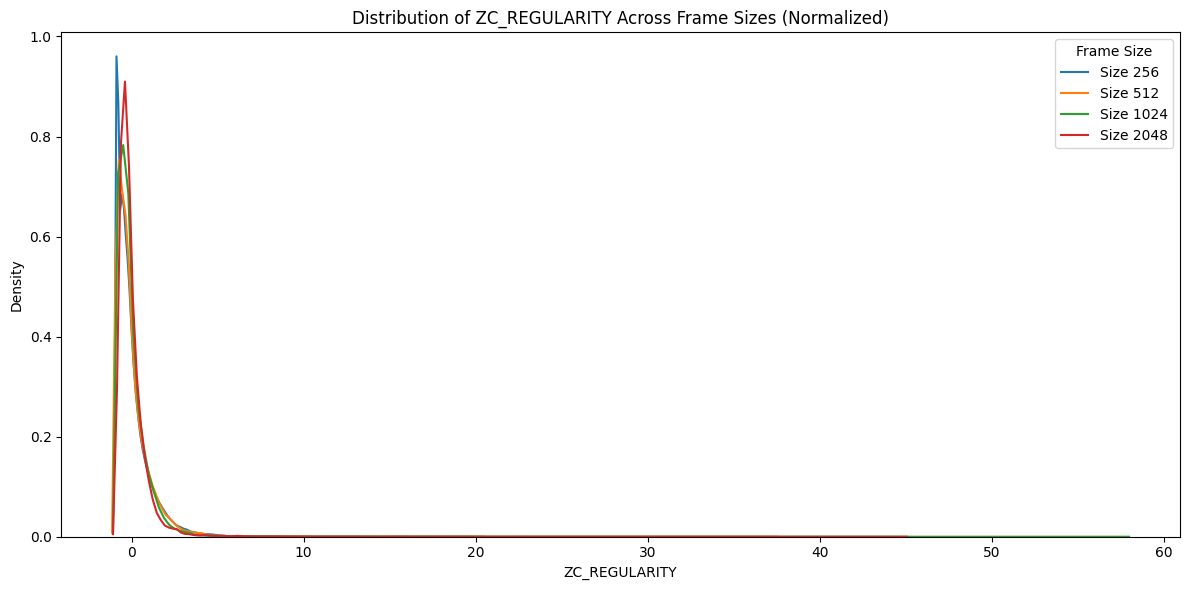

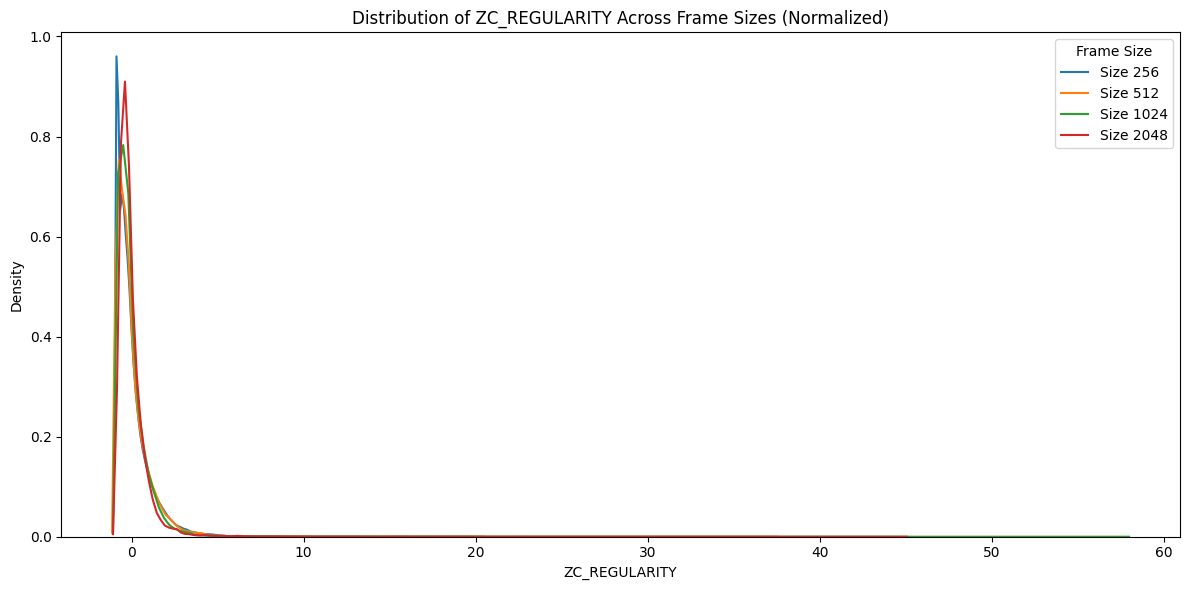

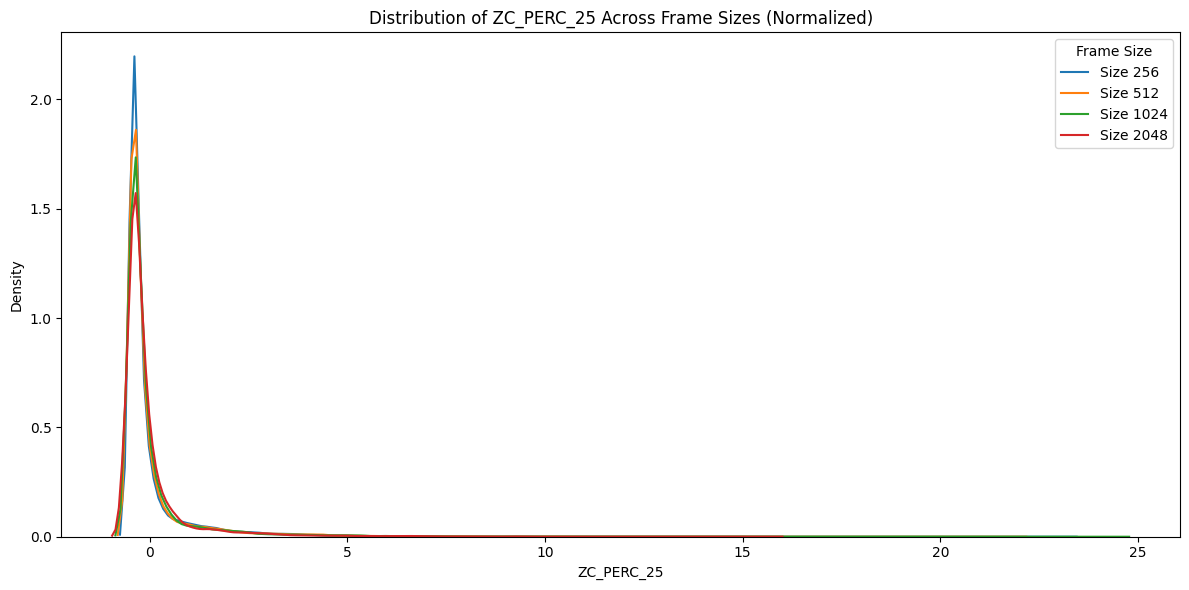

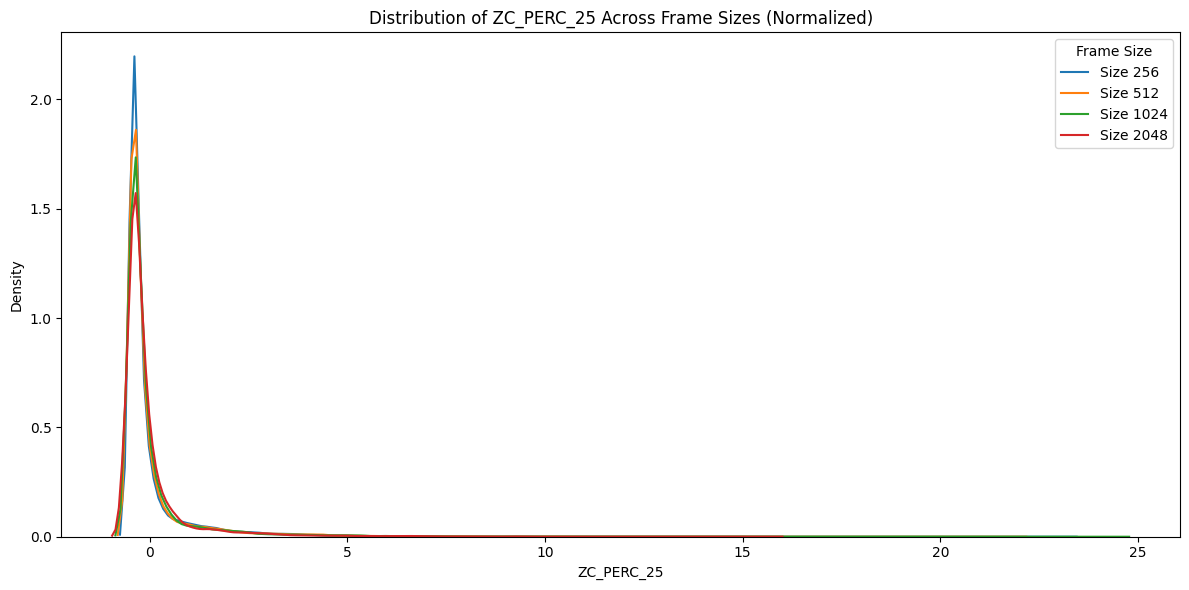

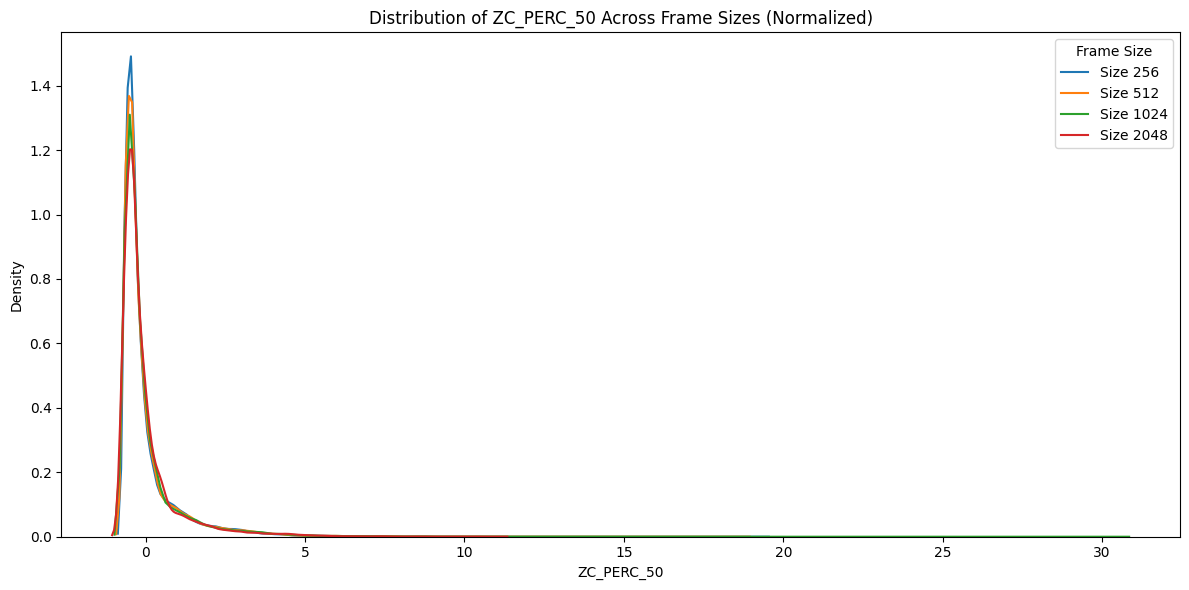

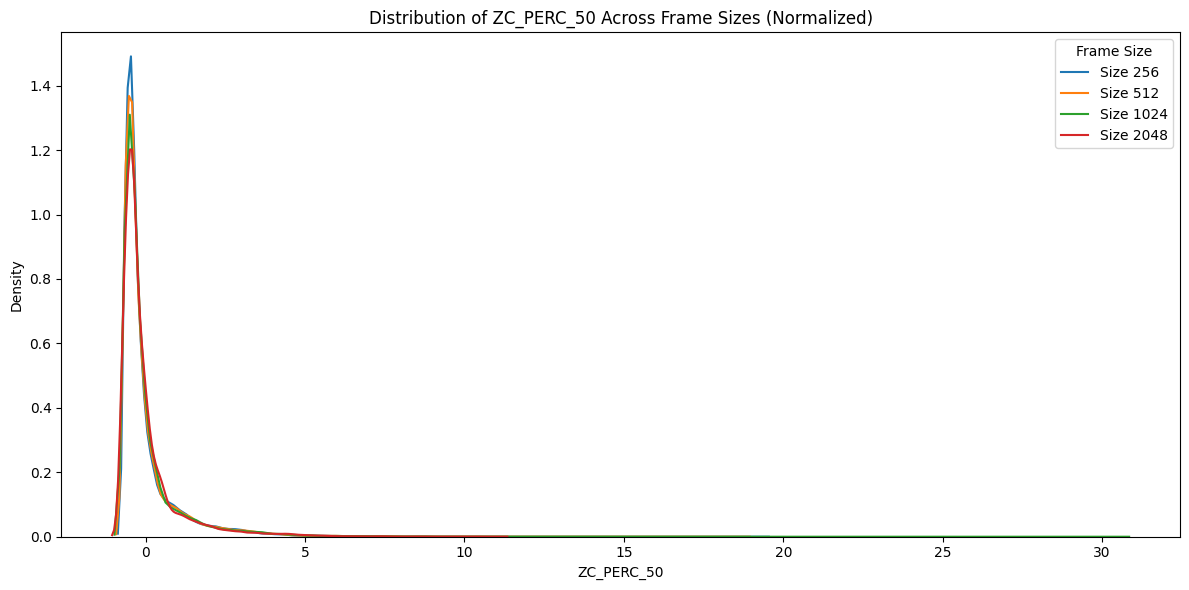

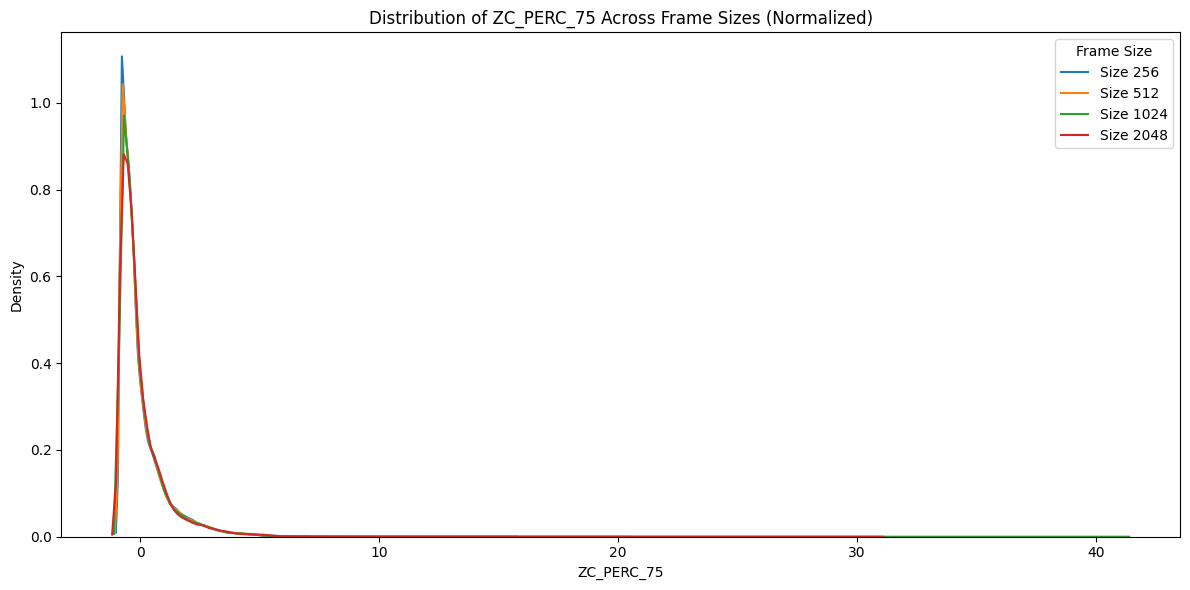

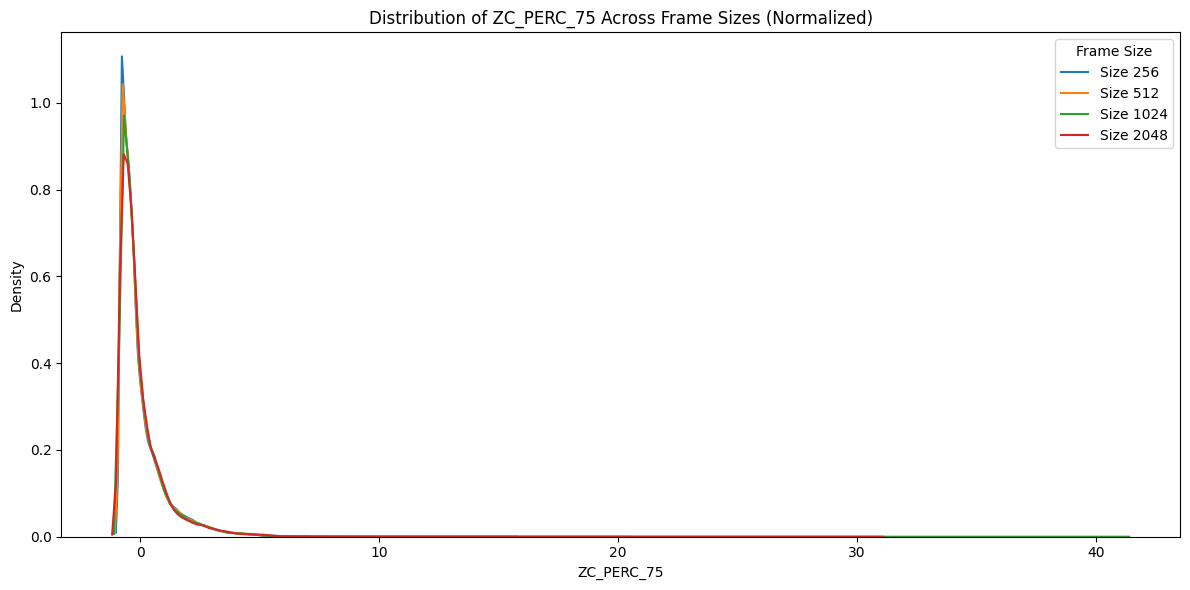

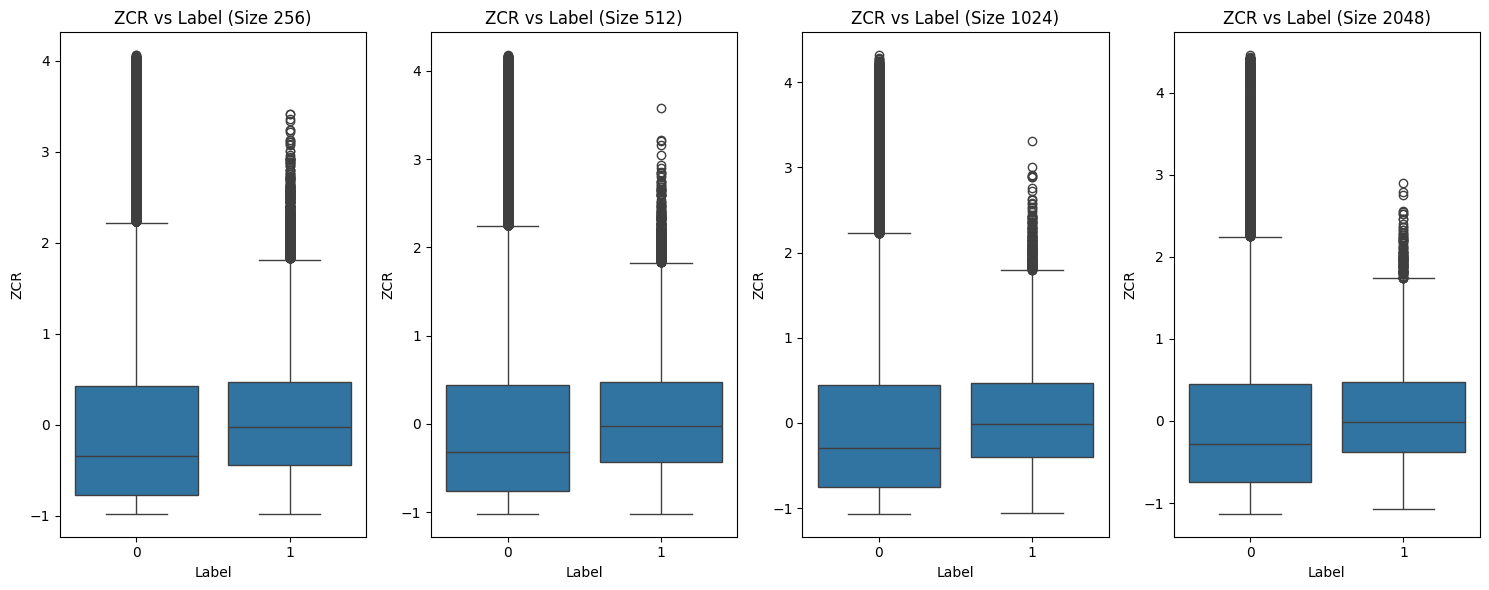

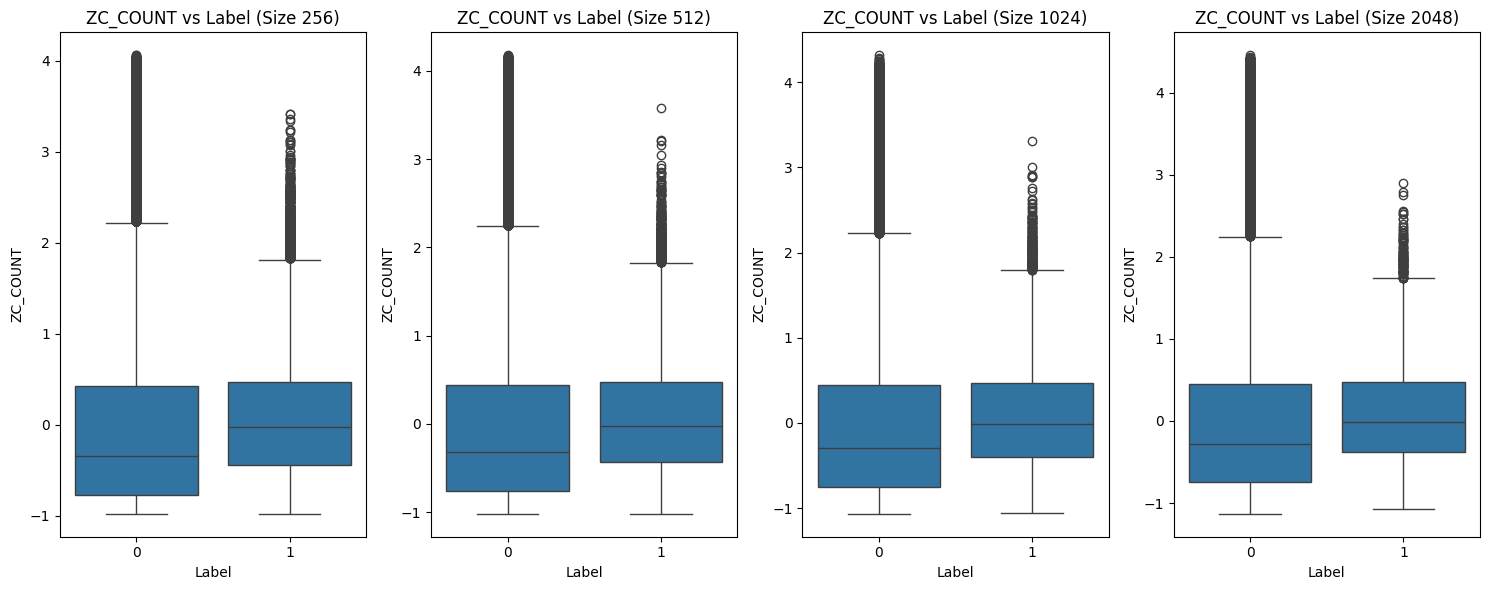

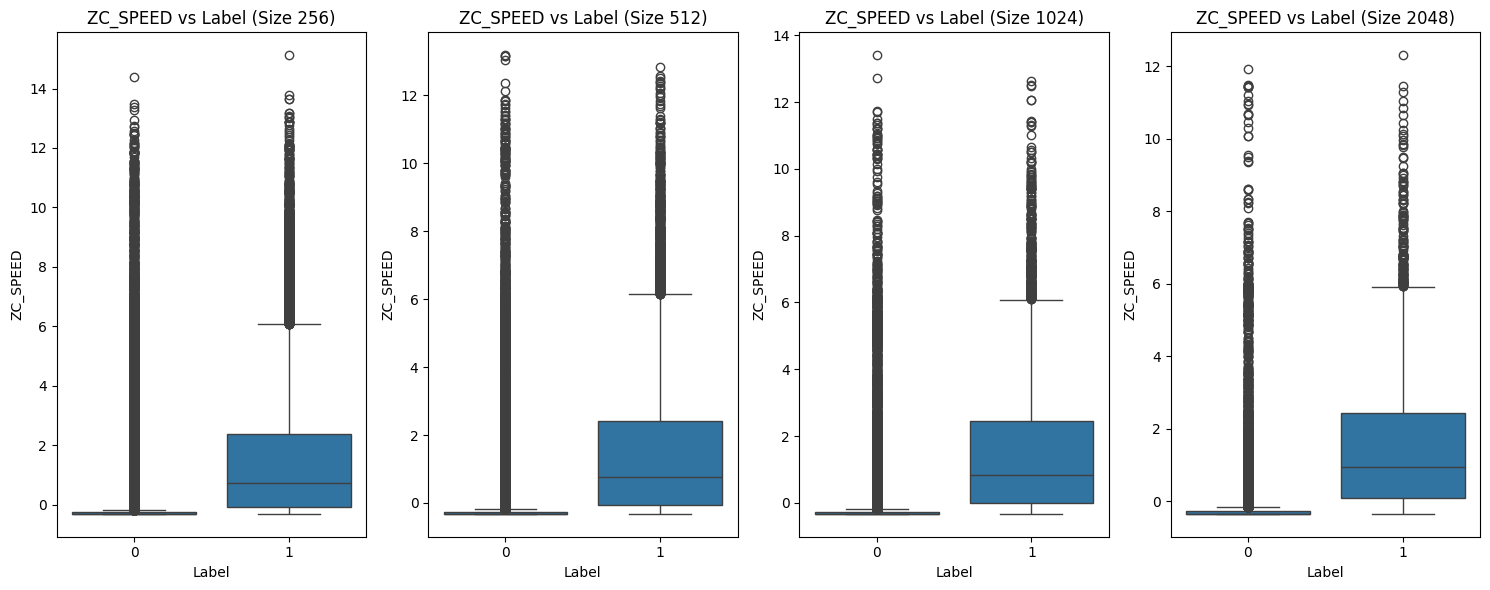

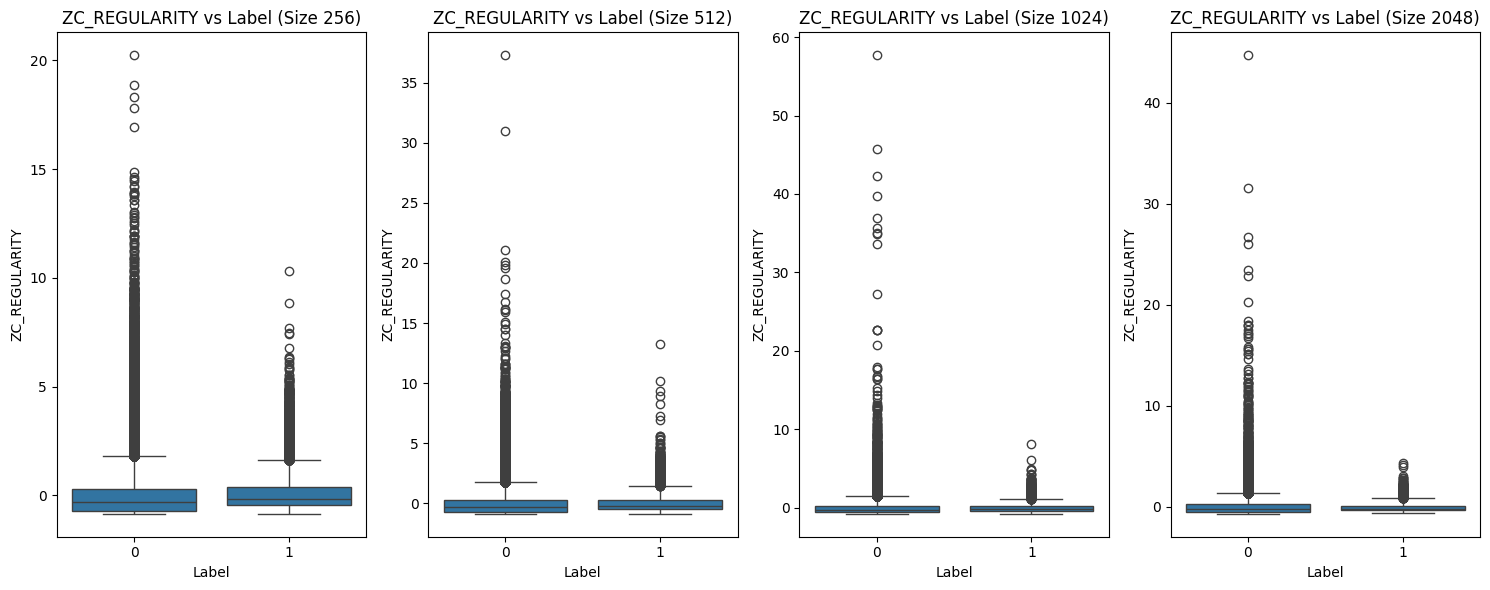

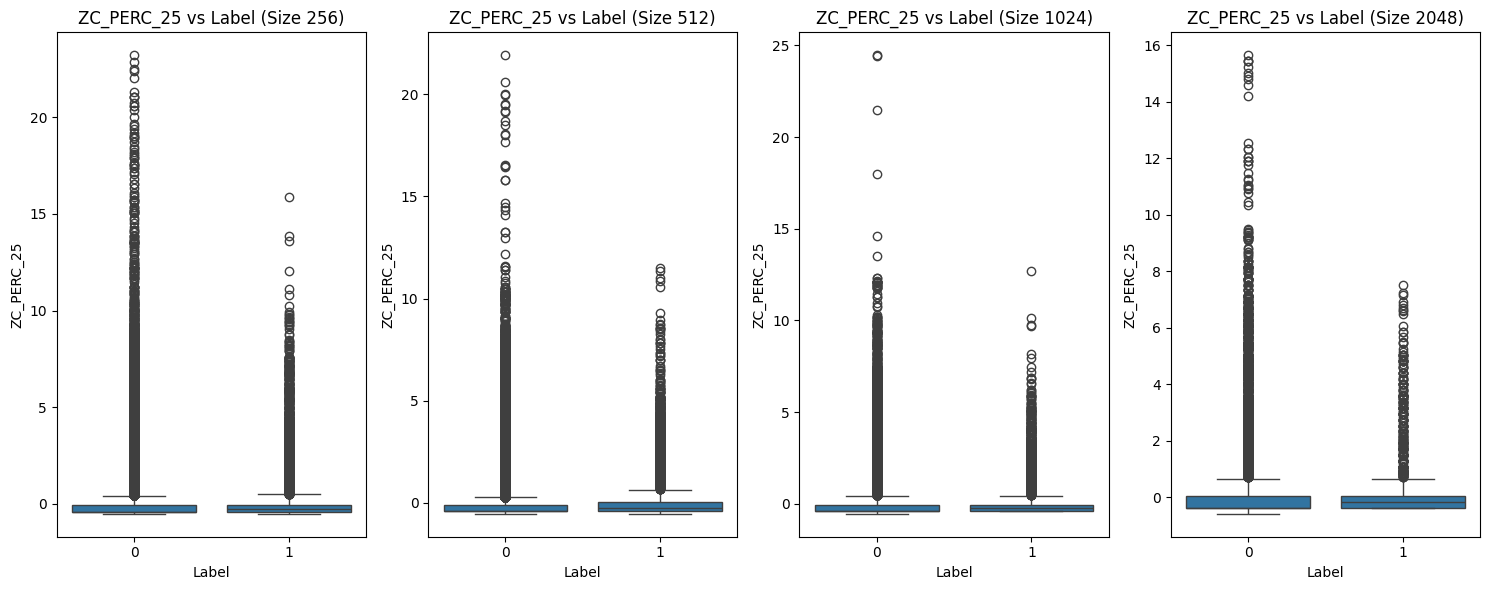

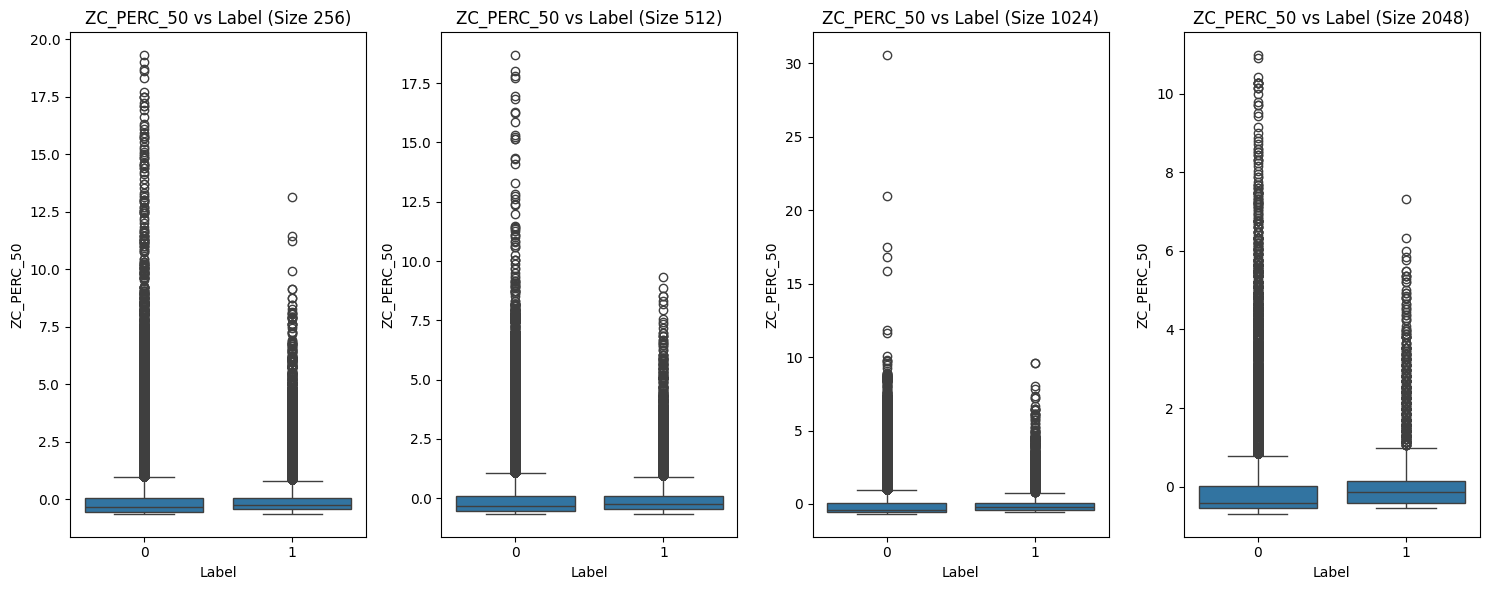

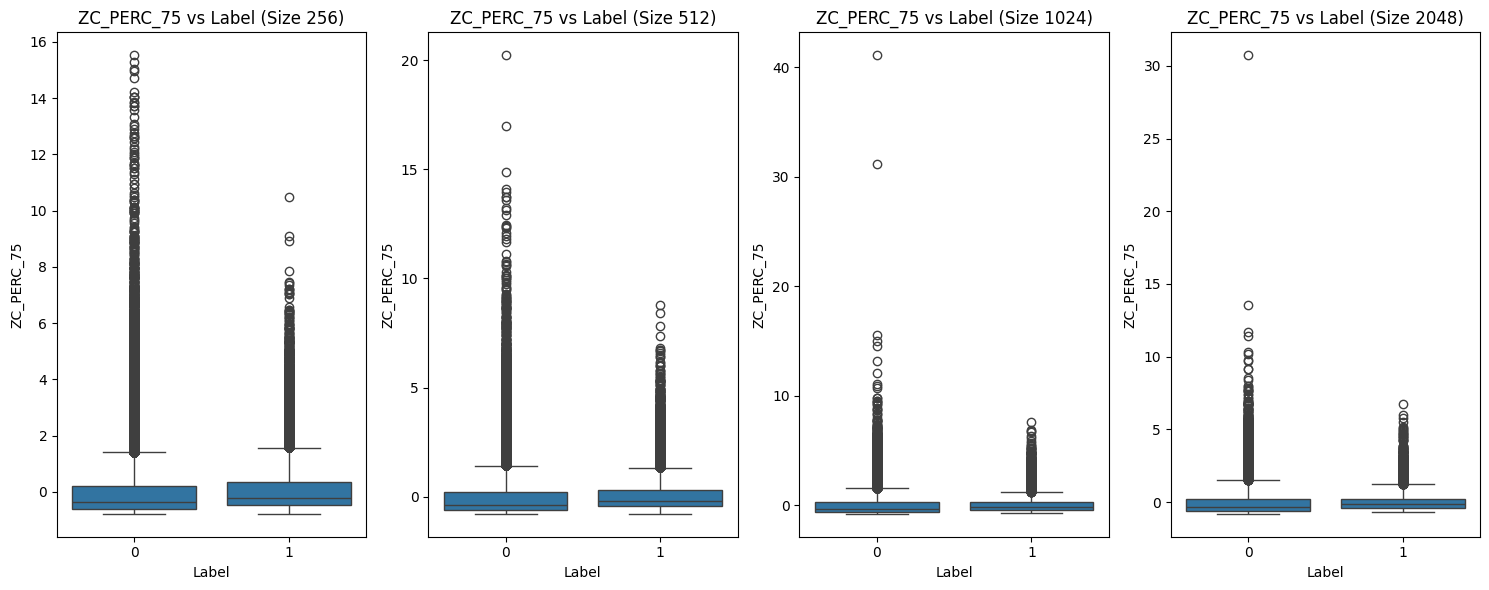

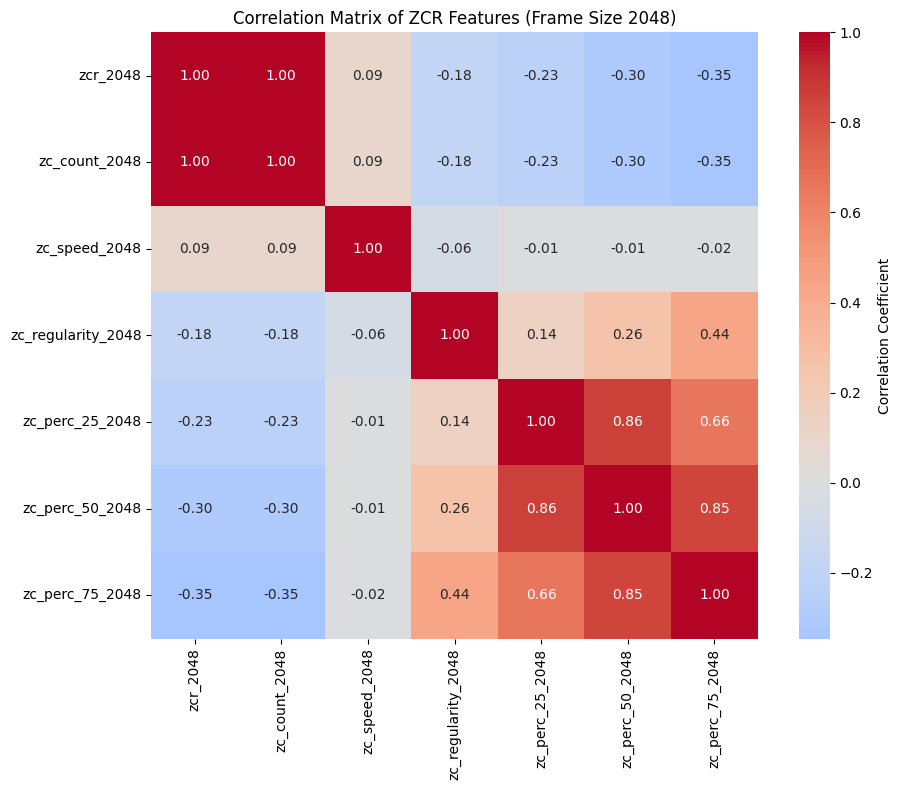

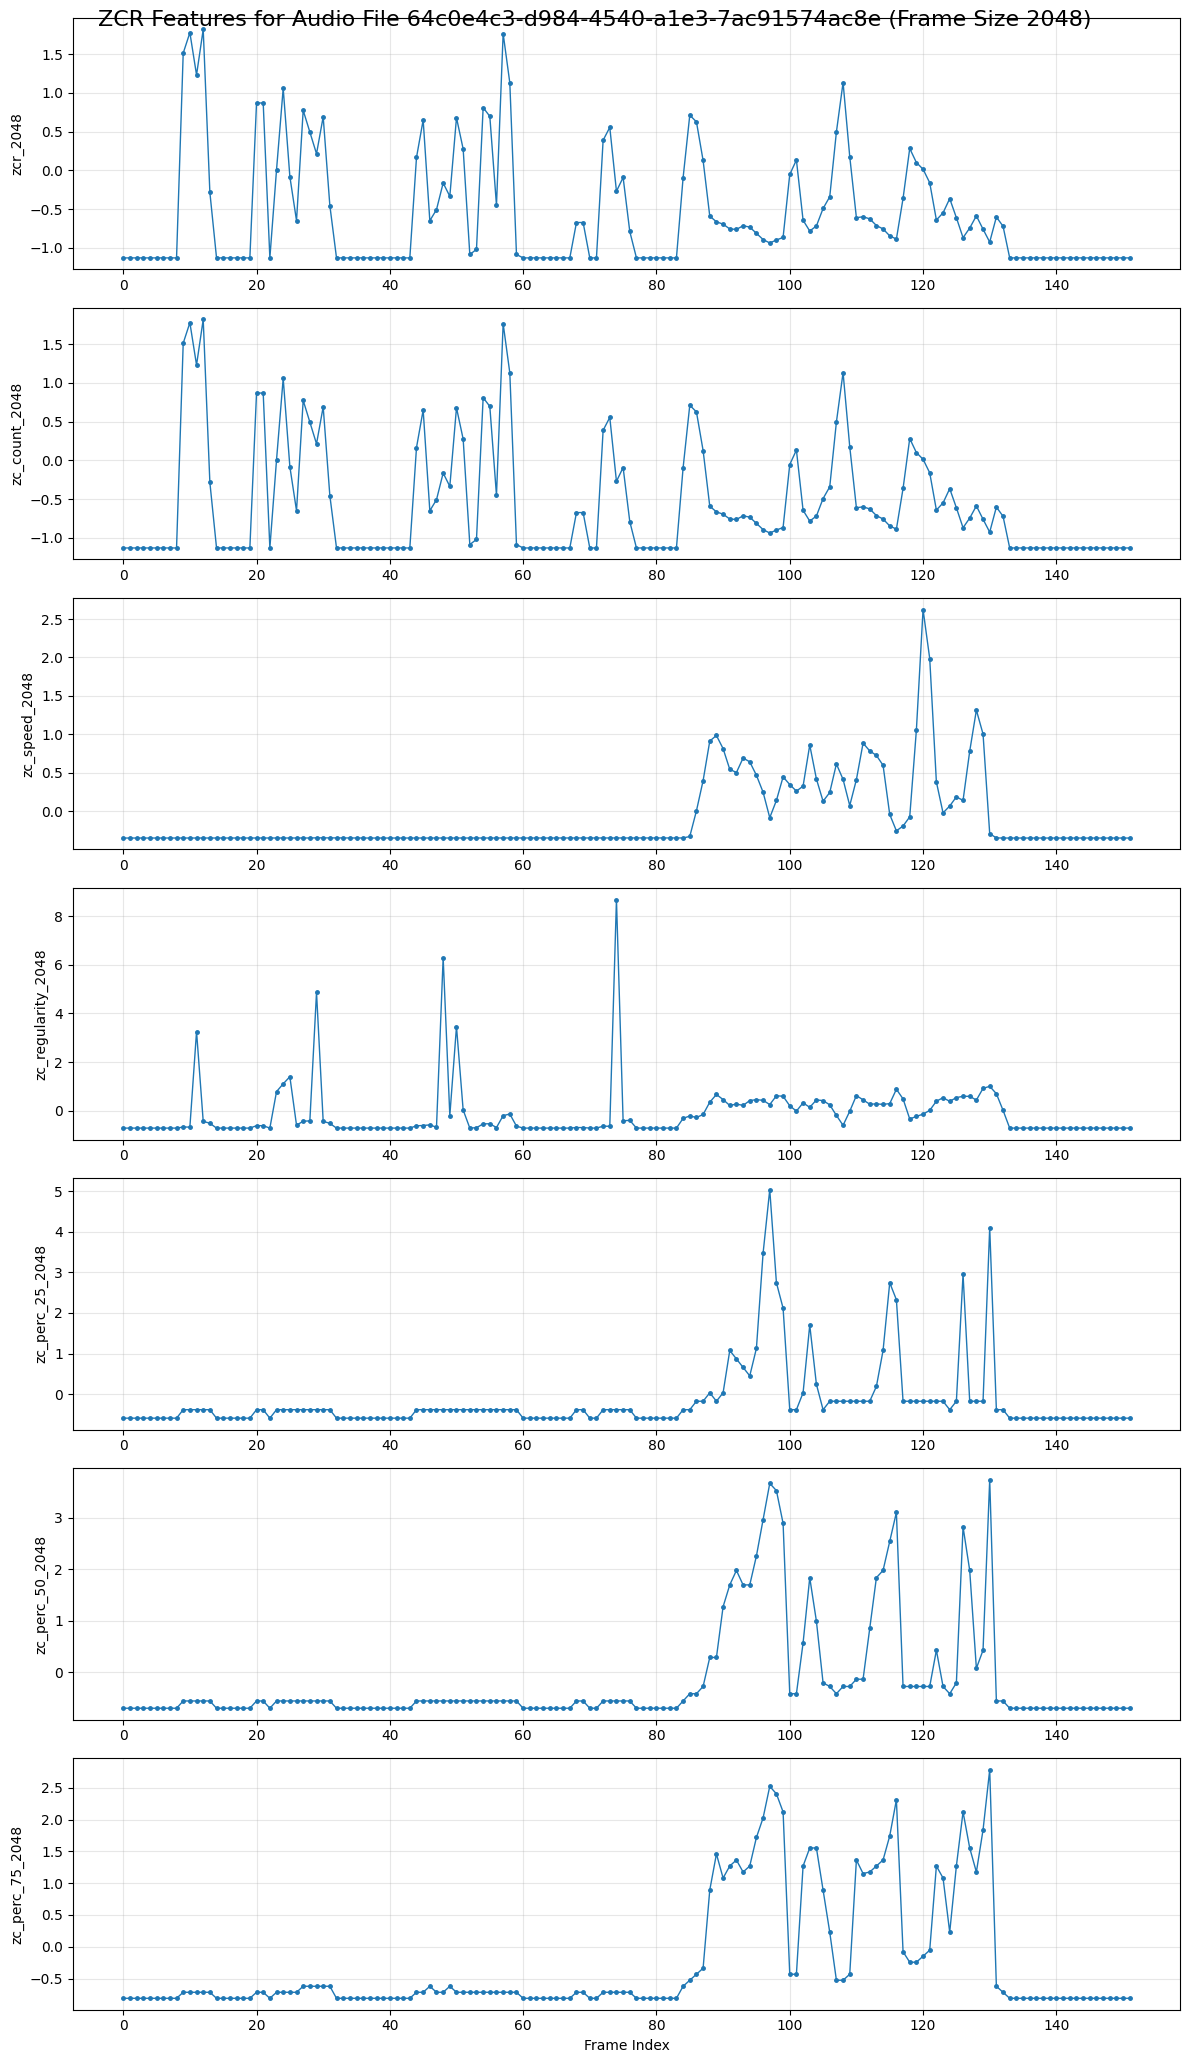


Sample rows for audio file 64c0e4c3-d984-4540-a1e3-7ac91574ac8e, frame size 2048:
                                    key  start   end  label  zcr_2048  \
0  64c0e4c3-d984-4540-a1e3-7ac91574ac8e      0  2048      0 -1.131505   
1  64c0e4c3-d984-4540-a1e3-7ac91574ac8e   1024  3072      0 -1.131505   
2  64c0e4c3-d984-4540-a1e3-7ac91574ac8e   2048  4096      0 -1.131505   
3  64c0e4c3-d984-4540-a1e3-7ac91574ac8e   3072  5120      0 -1.131505   
4  64c0e4c3-d984-4540-a1e3-7ac91574ac8e   4096  6144      0 -1.131505   

   zc_count_2048  zc_speed_2048  zc_regularity_2048  zc_perc_25_2048  \
0      -1.131505      -0.348361           -0.718619        -0.587589   
1      -1.131505      -0.348361           -0.718619        -0.587589   
2      -1.131505      -0.348361           -0.718619        -0.587589   
3      -1.131505      -0.348361           -0.718619        -0.587589   
4      -1.131505      -0.348361           -0.718619        -0.587589   

   zc_perc_50_2048  zc_perc_75_2048  
0      

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to get a random audio file key from a DataFrame
def get_random_audio_file(df):
    """
    Selects a random audio file key from a DataFrame.

    Args:
    df (pd.DataFrame): A DataFrame containing audio file keys.

    Returns:
    str: The key of a random audio file.
    """
    # Assuming 'key' is in one of the DataFrames in all_frames_from_save
    for frame_size in df:
        if 'key' in df[frame_size].columns:
            return random.choice(df[frame_size]['key'].tolist())
    raise ValueError("No 'key' column found in any of the DataFrames")

def plot_zcr_feature_distribution(all_frames, feature, frame_sizes=None, normalized=True):
    """
    Plots the distribution of a specific ZCR-related feature across different frame sizes.

    Args:
    all_frames (dict): Dictionary of DataFrames.
    feature (str): Base feature name (e.g., 'zcr', 'zc_speed').
    frame_sizes (list): Optional list of frame sizes to plot.
    normalized (bool): If True, normalizes the feature values for better comparison.
    """
    plt.figure(figsize=(12, 6))
    if frame_sizes is None:
        frame_sizes = sorted(all_frames.keys())

    for frame_size in frame_sizes:
        df = all_frames[frame_size]
        col = [c for c in df.columns if feature in c and str(frame_size) in c][0]

        if normalized:
            df[col] = (df[col] - df[col].mean()) / df[col].std()

        sns.kdeplot(data=df, x=col, label=f'Size {frame_size}')

    plt.title(f'Distribution of {feature.upper()} Across Frame Sizes' + (' (Normalized)' if normalized else ''))
    plt.xlabel(feature.upper())
    plt.ylabel('Density')
    plt.legend(title='Frame Size')
    plt.tight_layout()
    plt.show()

def plot_zcr_feature_by_label(all_frames, feature, frame_sizes=None):
    """
    Plots a specific ZCR-related feature against the label for different frame sizes.
    """
    if frame_sizes is None:
        frame_sizes = sorted(all_frames.keys())

    plt.figure(figsize=(15, 6))
    for i, frame_size in enumerate(frame_sizes, 1):
        plt.subplot(1, len(frame_sizes), i)
        df = all_frames[frame_size]
        col = [c for c in df.columns if feature in c and str(frame_size) in c][0]

        sns.boxplot(x='label', y=col, data=df)
        plt.title(f'{feature.upper()} vs Label (Size {frame_size})')
        plt.xlabel('Label')
        plt.ylabel(feature.upper())

    plt.tight_layout()
    plt.show()

def plot_zcr_feature_correlations(all_frames, frame_size=2048):
    """
    Plots a correlation matrix of all ZCR-related features for a given frame size.
    """
    df = all_frames[frame_size].copy()

    zcr_features = ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_25', 'zc_perc_50', 'zc_perc_75']
    feature_cols = [col for col in df.columns if any(feature in col and str(frame_size) in col for feature in zcr_features)]

    # Calculate correlations
    corr_matrix = df[feature_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title(f'Correlation Matrix of ZCR Features (Frame Size {frame_size})')
    plt.tight_layout()
    plt.show()

def visualize_zcr_features(all_frames, audio_file_key, frame_size=2048):
    """
    Visualizes all ZCR-related features for a specific audio file.
    """
    df = all_frames[frame_size].copy()
    df_filtered = df[df['key'] == audio_file_key].copy()

    if df_filtered.empty:
        raise ValueError(f"No data found for audio file key {audio_file_key} in frame size {frame_size}")

    df_filtered.sort_values('start', inplace=True)
    df_filtered.reset_index(drop=True, inplace=True)
    df_filtered['frame_index'] = range(len(df_filtered))

    zcr_features = ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_25', 'zc_perc_50', 'zc_perc_75']
    feature_cols = [col for col in df_filtered.columns if any(feature in col and str(frame_size) in col for feature in zcr_features)]

    num_features = len(feature_cols)
    fig, axes = plt.subplots(num_features, 1, figsize=(12, 3 * num_features))
    fig.suptitle(f'ZCR Features for Audio File {audio_file_key} (Frame Size {frame_size})', fontsize=16)

    for ax, col in zip(axes.flatten(), feature_cols):
        ax.plot(df_filtered['frame_index'], df_filtered[col], marker='.', linestyle='-', linewidth=1, markersize=5)
        ax.set_ylabel(col)
        ax.grid(alpha=0.3)

    axes[-1].set_xlabel('Frame Index')
    plt.tight_layout()
    plt.show()

    print(f"\nSample rows for audio file {audio_file_key}, frame size {frame_size}:")
    display_cols = ['key', 'start', 'end', 'label'] + feature_cols
    print(df_filtered[display_cols].head())

# Usage:
if all_frames_from_save:
    # Plot distributions for each ZCR-related feature
    for feature in ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_25', 'zc_perc_50', 'zc_perc_75']:
        plot_zcr_feature_distribution(all_frames_from_save, feature)
        # You can also plot normalized distributions for better comparison
        plot_zcr_feature_distribution(all_frames_from_save, feature, normalized=True)

    # Plot each feature against the label
    for feature in ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_25', 'zc_perc_50', 'zc_perc_75']:
        plot_zcr_feature_by_label(all_frames_from_save, feature)

    # Plot correlation matrix for a specific frame size
    plot_zcr_feature_correlations(all_frames_from_save, frame_size=2048)

    # Visualize all ZCR features for a random audio file
    random_audio_file_key = get_random_audio_file(all_frames_from_save)
    try:
        visualize_zcr_features(all_frames_from_save, random_audio_file_key)
    except ValueError as e:
        print(e)
        print("Trying another random file...")
        random_audio_file_key = get_random_audio_file(all_frames_from_save)
        visualize_zcr_features(all_frames_from_save, random_audio_file_key)

else:
    print("The 'all_frames_from_save' dictionary is empty.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import librosa
from PIL import Image
from matplotlib.animation import FuncAnimation, PillowWriter

def find_busy_region(frame, window_size=100):
    """
    Finds a region in the frame with the most zero-crossings.

    Args:
    frame (np.array or list): The audio frame data.
    window_size (int): Size of the sliding window to check.

    Returns:
    tuple: (start_index, end_index) of the busiest region.
    """
    if isinstance(frame, list):
        frame = np.array(frame)

    zero_crossings = librosa.zero_crossings(frame, pad=False)
    counts = [np.sum(zero_crossings[i:i+window_size]) for i in range(len(frame) - window_size)]
    busiest_start = np.argmax(counts)
    return busiest_start, busiest_start + window_size

def animate_zero_crossings(frame, frame_size, output_file="zcr_animation.gif", fps=5, start_idx=None, end_idx=None, zoom_title=""):
    """
    Creates an animation showing how zero-crossings are identified one by one in an audio frame.
    Now supports zooming into a specific region.

    Args:
    frame (np.array or list): The audio frame data.
    frame_size (int): Size of the frame (for display purposes).
    output_file (str): Path to save the animation file.
    fps (int): Frames per second for the animation.
    start_idx, end_idx (int, optional): Start and end indices for zooming.
    zoom_title (str, optional): Additional title for zoomed view.
    """
    if isinstance(frame, list):
        frame = np.array(frame)

    zero_crossings = librosa.zero_crossings(frame, pad=False)
    zero_indices = np.where(zero_crossings)[0]

    fig, ax = plt.subplots(figsize=(12, 4))
    if start_idx is not None and end_idx is not None:
        ax.set_xlim(start_idx, end_idx)
        ax.set_ylim(-max(np.abs(frame[start_idx:end_idx]).max(), 0.001) * 1.1,
                   max(np.abs(frame[start_idx:end_idx]).max(), 0.001) * 1.1)
    else:
        ax.set_xlim(0, frame_size)
        ax.set_ylim(-max(np.abs(frame).max(), 0.001) * 1.1,
                   max(np.abs(frame).max(), 0.001) * 1.1)

    ax.axhline(y=0, color='red', linestyle='--', alpha=0.8, label='0th Boundary')
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Amplitude")
    ax.grid(alpha=0.3)

    line, = ax.plot(range(len(frame)), frame, color='blue', alpha=0.6, label='Waveform')
    scatter = ax.scatter([], [], color='green', marker='o', s=50, alpha=1, label='Zero Crossings')

    # Initialize the counting meter and current crossing index text
    count_text = ax.text(0.05, 0.95, 'Zero Crossings: 0', transform=ax.transAxes, ha='left', va='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7), fontsize=10)
    current_text = ax.text(0.95, 0.95, 'Current: -', transform=ax.transAxes, ha='right', va='top',
                         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7), fontsize=10)

    # Calculate ZCR for display
    zcr = np.sum(zero_crossings) / len(frame)
    title = f'Zero-Crossing Evolution (Frame Size {frame_size}, ZCR: {zcr:.3f})'
    if zoom_title:
        title += f'\n{zoom_title}'
    ax.set_title(title)

    lines = []  # To store line objects for each zero-crossing

    def update(frame_idx):
        relevant_indices = [idx for idx in zero_indices if start_idx <= idx <= end_idx] if start_idx is not None else zero_indices

        if frame_idx < len(relevant_indices):
            idx = relevant_indices[frame_idx]
            scatter.set_offsets(np.column_stack([relevant_indices[:frame_idx+1], frame[relevant_indices[:frame_idx+1]]]))

            if frame_idx > 0:
                prev_idx = relevant_indices[frame_idx - 1]
                line, = ax.plot([prev_idx, idx], [frame[prev_idx], frame[idx]], color='green', linewidth=2, alpha=0.8)
                lines.append(line)

            count_text.set_text(f'Zero Crossings: {frame_idx + 1}/{len(relevant_indices)}')
            current_text.set_text(f'Current: {idx}')
        else:
            count_text.set_text(f'Total Zero Crossings: {len(relevant_indices)}')
            current_text.set_text('Completed')

        return [scatter, count_text, current_text] + lines

    # The +10 ensures the animation pauses for a moment at the end
    ani = FuncAnimation(fig, update, frames=range(len(zero_indices) + 10), interval=1000/fps, blit=True)
    plt.legend(loc='lower right')

    # Save the animation
    writer = PillowWriter(fps=fps)
    ani.save(output_file, writer=writer)
    plt.close()
    print(f"Animation saved to {output_file}")

# Usage in your main code
if all_frames_from_save:
    random_audio_file_key = get_random_audio_file(all_frames_from_save)
    viz_frame_size = 512

    if viz_frame_size in all_frames_from_save:
        df = all_frames_from_save[viz_frame_size]
        df_file = df[df['key'] == random_audio_file_key].copy().sort_values('start').reset_index(drop=True)

        if not df_file.empty:
            amp_columns = [col for col in df_file.columns if 'amp' in col.lower() and df_file[col].apply(lambda x: isinstance(x, (list, np.ndarray))).all()]
            if amp_columns:
                amp_column = amp_columns[0]
                print(f"Using '{amp_column}' for frame amplitude data.")

                # Get a random frame
                random_frame_index = np.random.randint(0, len(df_file))
                random_frame = df_file.iloc[random_frame_index][amp_column]

                # Full view animation
                animate_zero_crossings(random_frame, viz_frame_size,
                                     output_file=f"zcr_animation_full_{random_audio_file_key}_{random_frame_index}.gif",
                                     fps=5)

                # Find a busy region for zooming
                start_idx, end_idx = find_busy_region(random_frame, window_size=100)

                # Zoomed-in view animation
                animate_zero_crossings(random_frame, viz_frame_size,
                                     output_file=f"zcr_animation_zoomed_{random_audio_file_key}_{random_frame_index}_{start_idx}_{end_idx}.gif",
                                     fps=2,  # Slower for the zoomed view
                                     start_idx=start_idx, end_idx=end_idx,
                                     zoom_title=f"Zoomed Region: {start_idx}-{end_idx}")
            else:
                print("No suitable column found containing frame amplitude data.")
        else:
            print(f"No data found for audio file key {random_audio_file_key} in frame size {viz_frame_size}")
    else:
        print(f"Frame size {viz_frame_size} not found. Available sizes: {list(all_frames_from_save.keys())}")
else:
    print("The 'all_frames_from_save' dictionary is empty.")

Using 'amp' for frame amplitude data.
Animation saved to zcr_animation_full_d769f90f-8183-4c42-8ea6-cf992ee40a64_524.gif
Animation saved to zcr_animation_zoomed_d769f90f-8183-4c42-8ea6-cf992ee40a64_524_7_107.gif


## Fourth Try

In [ ]:
def enhanced_zcr_features(frame_df):
    def zcr_features(frame):
        # Convert frame to numpy array if it's not already
        if isinstance(frame, list):
            frame = np.array(frame)

        # Calculate zero-crossings
        zero_crossings = librosa.zero_crossings(frame, pad=False)
        count = np.sum(zero_crossings)
        rate = count / len(frame)

        # Calculate zero-crossing speed (steepness)
        zero_indices = np.where(zero_crossings)[0]
        if len(zero_indices) > 1:
            speeds = np.abs(frame[zero_indices[1:]] - frame[zero_indices[:-1]])
            avg_speed = np.mean(speeds)
        else:
            avg_speed = 0

        # Calculate distances between zero-crossings
        if len(zero_indices) > 1:
            distances = np.diff(zero_indices)
            std_dist = np.std(distances)  # Regularity
            percentiles = np.percentile(distances, [25, 50, 75])
        else:
            std_dist = 0
            percentiles = [0, 0, 0]

        return {
            'zcr': rate,
            'zc_count': count,
            'zc_speed': avg_speed,
            'zc_regularity': std_dist,
            'zc_perc_25': percentiles[0],
            'zc_perc_50': percentiles[1],
            'zc_perc_75': percentiles[2]
        }

    # Apply zcr_features to each frame and store results in a list
    zcr_results = frame_df['amp'].apply(zcr_features).tolist()

    # Convert the list of dictionaries to a DataFrame
    zcr_df = pd.DataFrame(zcr_results)

    # Keep all columns except 'amp' for concatenation
    columns_to_keep = [col for col in frame_df.columns if col != 'amp']
    final_df = pd.concat([frame_df[columns_to_keep].reset_index(drop=True), zcr_df], axis=1)

    # Add back the 'amp' column without concatenating it
    final_df['amp'] = frame_df['amp'].values

    return final_df

# Apply enhanced ZCR calculation to each frame size
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size].copy()  # Create a copy to avoid modifying the original
    df = enhanced_zcr_features(df)

    # Rename columns to include frame size for clarity
    rename_dict = {
        'zcr': f'zcr_{frame_size}',
        'zc_count': f'zc_count_{frame_size}',
        'zc_speed': f'zc_speed_{frame_size}',
        'zc_regularity': f'zc_regularity_{frame_size}',
        'zc_perc_25': f'zc_perc_25_{frame_size}',
        'zc_perc_50': f'zc_perc_50_{frame_size}',
        'zc_perc_75': f'zc_perc_75_{frame_size}'
    }
    df.rename(columns=rename_dict, inplace=True)

    # Check if any of the percentile columns are missing and add them if needed
    for perc in [25, 50, 75]:
        col_name = f'zc_perc_{perc}_{frame_size}'
        if col_name not in df.columns:
            df[col_name] = 0  # or another appropriate default value
            print(f"Added missing column {col_name} with default value 0")

    all_frames_from_save[frame_size] = df
    print(f"Calculated enhanced ZCR features for frame size {frame_size}")

# Let's verify the changes by looking at each DataFrame
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size]
    print(f"\nColumns in DataFrame for frame size {frame_size}:")
    print(df.columns)
    print("\nFirst few rows (excluding 'amp' column):")
    display_cols = ['key', 'frame_index', f'zcr_{frame_size}', f'zc_count_{frame_size}',
                  f'zc_speed_{frame_size}', f'zc_regularity_{frame_size}',
                  f'zc_perc_25_{frame_size}', f'zc_perc_50_{frame_size}', f'zc_perc_75_{frame_size}', 'label']
    print(df[display_cols].sample(5))
    print("-" * 50)

# Let's also check for any duplicate column names
for frame_size, df in all_frames_from_save.items():
    duplicate_columns = [col for col in df.columns if df.columns.tolist().count(col) > 1]
    if duplicate_columns:
        print(f"Warning: Duplicate columns found in frame size {frame_size}: {duplicate_columns}")
    else:
        print(f"No duplicate columns found in frame size {frame_size}")

KeyboardInterrupt: 

In [ ]:
# Let's verify the changes by looking at each DataFrame
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size]
    print(f"\nColumns in DataFrame for frame size {frame_size}:")
    print(df.columns)
    print("\nFirst few rows:")
    display_cols = ['key', 'frame_index', f'zcr_{frame_size}', f'zc_count_{frame_size}',
                  f'zc_speed_{frame_size}', f'zc_regularity_{frame_size}', 'label']
    print(df[display_cols].sample(5))
    print("-" * 50)


Columns in DataFrame for frame size 256:
Index(['key', 'sf', 'start', 'end', 'max_amp', 'frame_index', 'label',
       'zcr_256', 'zc_count_256', 'zc_speed_256', 'zc_regularity_256',
       'zc_perc_25_256', 'zc_perc_50_256', 'zc_perc_75_256', 'zcr_256',
       'zc_count_256', 'zc_speed_256', 'zc_regularity_256', 'zc_perc_25_256',
       'zc_perc_50_256', 'zc_perc_75_256', 'amp'],
      dtype='object')

First few rows:
                                         key  frame_index   zcr_256   zcr_256  \
134267  aa059172-1850-4afe-8809-2fe79603286a         1419  0.257812  0.257812   
194231  ff1234d7-7837-4ba7-842f-99fdc916baa9          448  0.000000  0.000000   
3559    824a8cf9-1199-48bf-aad5-65539d6d2011          151  0.324219  0.324219   
3667    824a8cf9-1199-48bf-aad5-65539d6d2011          259  0.289062  0.289062   
35049   64da4ad6-4280-49a1-bd37-e35efd7837c6         1687  0.000000  0.000000   

        zc_count_256  zc_count_256  zc_speed_256  zc_speed_256  \
134267            66   

## Third attempt

In [ ]:
def enhanced_zcr_features(frame_df):
    def zcr_features(frame):
        # Convert frame to numpy array if it's not already
        if isinstance(frame, list):
            frame = np.array(frame)

        # Calculate zero-crossings
        zero_crossings = librosa.zero_crossings(frame, pad=False)
        count = np.sum(zero_crossings)
        rate = count / len(frame)

        # Calculate zero-crossing speed (steepness)
        zero_indices = np.where(zero_crossings)[0]
        if len(zero_indices) > 1:
            speeds = np.abs(frame[zero_indices[1:]] - frame[zero_indices[:-1]])
            avg_speed = np.mean(speeds)
        else:
            avg_speed = 0

        # Calculate distances between zero-crossings
        if len(zero_indices) > 1:
            distances = np.diff(zero_indices)
            std_dist = np.std(distances)  # Regularity
            percentiles = np.percentile(distances, [25, 50, 75])
        else:
            std_dist = 0
            percentiles = [0, 0, 0]

        return {
            'zcr': rate,
            'zc_count': count,
            'zc_speed': avg_speed,
            'zc_regularity': std_dist,
            'zc_perc_25': percentiles[0],
            'zc_perc_50': percentiles[1],
            'zc_perc_75': percentiles[2]
        }

    # Apply zcr_features to each frame and store results in a list
    zcr_results = frame_df['amp'].apply(zcr_features).tolist()

    # Convert the list of dictionaries to a DataFrame
    zcr_df = pd.DataFrame(zcr_results)

    # Ensure no duplicate columns are created
    final_df = pd.concat([frame_df.reset_index(drop=True), zcr_df], axis=1)

    return final_df

# Apply enhanced ZCR calculation to each frame size
for frame_size in [256, 512, 1024, 2048]:
    all_frames_from_save[frame_size] = enhanced_zcr_features(all_frames_from_save[frame_size])
    print(f"Calculated enhanced ZCR features for frame size {frame_size}")

# Let's look at the results for one of the frame sizes, e.g., 1024
df_frame_from_save = all_frames_from_save[1024]
print("\nFirst few rows of the DataFrame with enhanced ZCR features (frame size 1024):")
print(df_frame_from_save[['key', 'frame_index', 'zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_50', 'label']].head())

# Check if 'key' column exists in each DataFrame
for frame_size, df in all_frames_from_save.items():
    assert 'key' in df.columns, f"'key' column missing in DataFrame for frame size {frame_size}"
    assert df['key'].nunique() == len(df), f"Duplicates found in 'key' column for frame size {frame_size}"

# Proceed with the original logic, now with added confidence in the structure of the DataFrames
file_zc_counts = {}
for frame_size, df in all_frames_from_save.items():
    grouped = df.groupby('key').agg({
        'zc_count': 'sum',
        'sf': 'first',  # Assuming sample rate is constant per file
        'label': 'mean'  # This will give us the proportion of event frames
    })
    file_zc_counts[frame_size] = grouped

# Combine all frame sizes into one DataFrame
combined_zc_counts = pd.concat(
    [df.assign(frame_size=size) for size, df in file_zc_counts.items()],
    ignore_index=True
)

# Calculate zero-crossing density (per second) - be careful with this part
combined_zc_counts['zc_density'] = combined_zc_counts.apply(lambda row:
    row['zc_count'] / (len(df_from_save.loc[row.name]['amp']) / row['sf']), axis=1)

print("\nZero-crossing counts and density per file:")
print(combined_zc_counts.head())

# Visualize some of the new features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size]
    sns.kdeplot(data=df, x='zc_speed', label=f'Frame Size {frame_size}')
plt.title('Distribution of Zero-Crossing Speed')
plt.xlabel('Speed (Steepness)')

plt.subplot(2, 2, 2)
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size]
    sns.kdeplot(data=df, x='zc_regularity', label=f'Frame Size {frame_size}')
plt.title('Distribution of Zero-Crossing Regularity')
plt.xlabel('Standard Deviation of Distances')

plt.subplot(2, 2, 3)
sns.scatterplot(data=combined_zc_counts[combined_zc_counts['frame_size']==1024],
               x='zc_count', y='label', alpha=0.7, size='zc_density')
plt.title('ZC Count vs Event Proportion (Frame Size 1024)')
plt.xlabel('Total Zero-Crossings')
plt.ylabel('Proportion of Event Frames')

plt.subplot(2, 2, 4)
sns.boxplot(data=all_frames_from_save[1024], x='label', y='zc_perc_50')
plt.title('Median ZC Distance vs Label (Frame Size 1024)')
plt.xlabel('Label (0: Non-event, 1: Event)')
plt.ylabel('Median Distance Between ZCs')

plt.tight_layout()
plt.show()

# Let's also create a correlation heatmap for the 1024 frame size
plt.figure(figsize=(10, 8))
features = ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_25', 'zc_perc_50', 'zc_perc_75', 'label']
corr_matrix = all_frames_from_save[1024][features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Zero-Crossing Features (Frame Size 1024)')
plt.tight_layout()
plt.show()

# Calculate average features per file for frame size 1024
file_avg_features = all_frames_from_save[1024].groupby('key').agg({
    'zcr': 'mean',
    'zc_count': 'mean',
    'zc_speed': 'mean',
    'zc_regularity': 'mean',
    'zc_perc_50': 'mean',
    'label': 'mean'
})

# Sort by proportion of event frames
file_avg_features = file_avg_features.sort_values('label', ascending=False)

# Plot the top 10 files with the highest proportion of event frames
top_10_files = file_avg_features.head(10)

plt.figure(figsize=(12, 6))

for feature in ['zcr', 'zc_count', 'zc_speed', 'zc_regularity', 'zc_perc_50']:
    plt.plot(top_10_files.index, top_10_files[feature], marker='o', label=feature)

plt.title('Zero-Crossing Features for Top 10 Files (Most Event Frames)')
plt.xlabel('File Key')
plt.ylabel('Feature Value (Normalized)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Calculated enhanced ZCR features for frame size 256
Calculated enhanced ZCR features for frame size 512
Calculated enhanced ZCR features for frame size 1024
Calculated enhanced ZCR features for frame size 2048

First few rows of the DataFrame with enhanced ZCR features (frame size 1024):
                                    key  frame_index       zcr       zcr  \
0  008c1c9e-aeef-40c5-846c-24f1b964f884            0  0.134766  0.134766   
1  008c1c9e-aeef-40c5-846c-24f1b964f884            1  0.174805  0.174805   
2  008c1c9e-aeef-40c5-846c-24f1b964f884            2  0.084961  0.084961   
3  008c1c9e-aeef-40c5-846c-24f1b964f884            3  0.092773  0.092773   
4  008c1c9e-aeef-40c5-846c-24f1b964f884            4  0.106445  0.106445   

        zcr       zcr  zc_count  zc_count  zc_count  zc_count  zc_speed  \
0  0.134766  0.134766     138.0     138.0     138.0       138  0.000027   
1  0.174805  0.174805     179.0     179.0     179.0       179  0.000054   
2  0.084961  0.084961      87

AssertionError: Duplicates found in 'key' column for frame size 256

## 2nd attempt

Calculated ZCR for frame size 256
Calculated ZCR for frame size 512
Calculated ZCR for frame size 1024
Calculated ZCR for frame size 2048

First few rows of the DataFrame with ZCR (frame size 1024):
                                    key  frame_index       zcr  label
0  008c1c9e-aeef-40c5-846c-24f1b964f884            0  0.000000      0
1  008c1c9e-aeef-40c5-846c-24f1b964f884            1  0.222656      0
2  008c1c9e-aeef-40c5-846c-24f1b964f884            2  0.269531      0
3  008c1c9e-aeef-40c5-846c-24f1b964f884            3  0.076172      0
4  008c1c9e-aeef-40c5-846c-24f1b964f884            4  0.080078      0


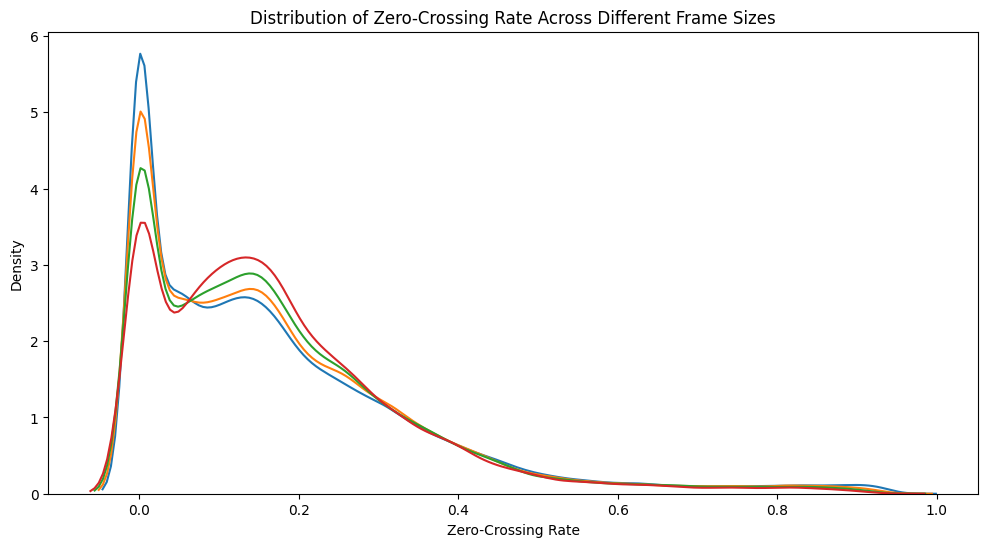

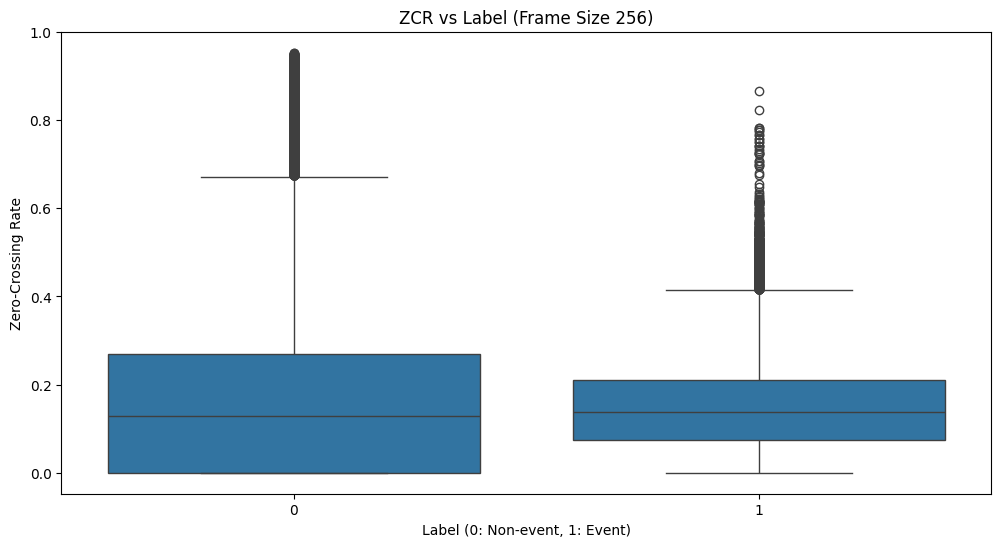

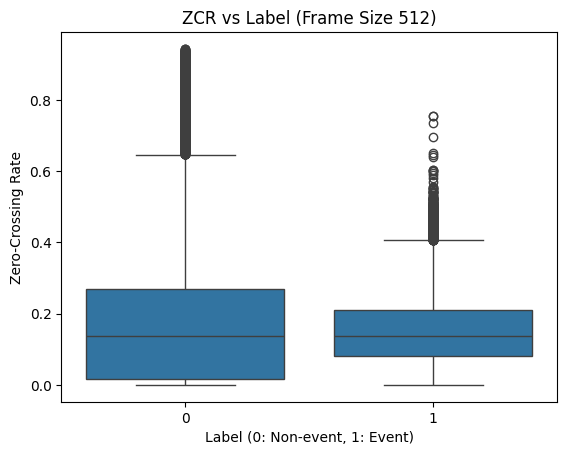

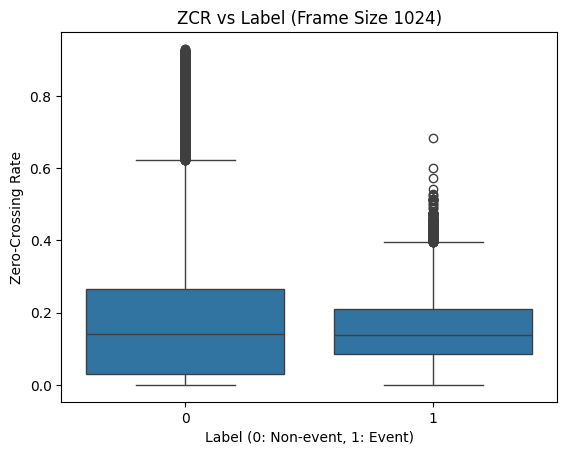

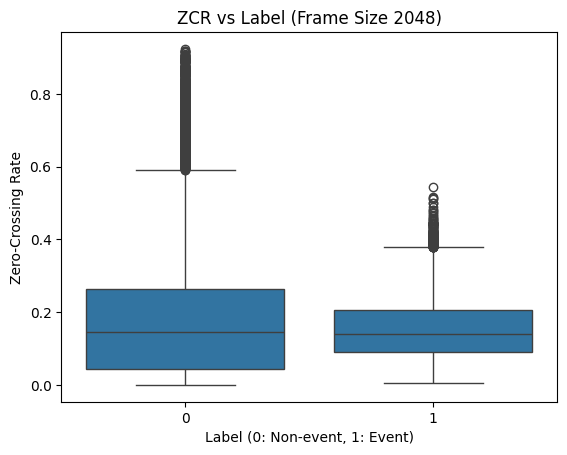

In [ ]:
def calculate_zcr(frame_df):
    def zcr(frame):
        # Convert frame to numpy array if it's not already
        if isinstance(frame, list):
            frame = np.array(frame)

        # Calculate zero-crossing rate
        zero_crossings = librosa.zero_crossings(frame, pad=False)
        return np.sum(zero_crossings) / len(frame)

    # Apply ZCR function to each frame
    frame_df['zcr'] = frame_df['amp'].apply(zcr)
    return frame_df

# Apply ZCR calculation to each frame size
for frame_size in [256, 512, 1024, 2048]:
    all_frames_from_save[frame_size] = calculate_zcr(all_frames_from_save[frame_size])
    print(f"Calculated ZCR for frame size {frame_size}")

# Let's look at the results for one of the frame sizes, e.g., 1024
df_frame_from_save = all_frames_from_save[512]
print("\nFirst few rows of the DataFrame with ZCR (frame size 1024):")
print(df_frame_from_save[['key', 'frame_index', 'zcr', 'label']].head())

# Let's also visualize the distribution of ZCR values
plt.figure(figsize=(12, 6))
for frame_size in [256, 512, 1024, 2048]:
    sns.kdeplot(data=all_frames_from_save[frame_size], x='zcr', label=f'Frame Size {frame_size}')

plt.title('Distribution of Zero-Crossing Rate Across Different Frame Sizes')
plt.xlabel('Zero-Crossing Rate')
plt.ylabel('Density')
plt.show()

# We can also compare ZCR between labeled and non-labeled frames
plt.figure(figsize=(12, 6))
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size]
    sns.boxplot(x='label', y='zcr', data=df)
    plt.title(f'ZCR vs Label (Frame Size {frame_size})')
    plt.xlabel('Label (0: Non-event, 1: Event)')
    plt.ylabel('Zero-Crossing Rate')
    plt.show()

In [ ]:
all_frames_from_save.shape

AttributeError: 'dict' object has no attribute 'shape'

In [ ]:
for frame_size in [256, 512, 1024, 2048]:
    df = all_frames_from_save[frame_size]
    print(f"\nFrame Size: {frame_size}")
    print(f"Shape: {df.shape}")
    print("First few rows:")
    print(df[['key', 'sf', 'start', 'end', 'max_amp', 'frame_index', 'label', 'zcr']].sample(5))
    print("-" * 50)


Frame Size: 256
Shape: (226033, 9)
First few rows:
                                         key     sf   start     end  \
208184  89c97828-25b3-4957-8f2c-8da426e68d74  22050  120832  121088   
105792  21aee478-6d13-45ea-be4d-4f29fd244798  22050  216192  216448   
98045   88571a5b-7d25-4373-86f8-f784dbceabec  22050   91648   91904   
154134  8f5531fb-5c2a-450b-b14c-4321085887d8  22050  177792  178048   
6935    bcf8e484-3423-4654-83e5-8188ef14e73f  22050   20480   20736   

             max_amp  frame_index  label       zcr  
208184  1.947203e-02          944      0  0.261719  
105792  3.586902e-05         1689      0  0.695312  
98045   1.914122e-03          716      0  0.156250  
154134  0.000000e+00         1389      0  0.000000  
6935    3.073928e-11          160      0  0.000000  
--------------------------------------------------

Frame Size: 512
Shape: (112895, 9)
First few rows:
                                        key     sf   start     end   max_amp  \
56320  f5a661dc-8161

## 1st attempt

In [ ]:
import librosa
import numpy as np
import pandas as pd

def zero_crossing_rate(signal):
    """
    Compute the zero-crossing rate of the audio signal.

    Args:
        signal (numpy.ndarray): The audio signal.

    Returns:
        float: The zero-crossing rate for the signal.
    """
    zcr = librosa.feature.zero_crossing_rate(signal, frame_length=len(signal), hop_length=len(signal))
    return zcr[0][0]  # Return the single zero-crossing rate value

def calculate_zcr(df):
    """
    Calculate the zero-crossing rate for each frame in the dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the audio data.

    Returns:
        pandas.DataFrame: The dataframe with the zero-crossing rate added.
    """
    # Entry Criteria
    if 'amp' not in df.columns:
        raise ValueError("The dataframe must contain an 'amp' column.")
    if df.empty:
        raise ValueError("The input dataframe is empty.")

    # Data Validation
    if df['amp'].isnull().any():
        print("Warning: The 'amp' column contains null or missing values. Replacing with zeros.")
        df['amp'] = df['amp'].fillna(0)
    if df['amp'].apply(lambda x: isinstance(x, (list, np.ndarray))).all() is False:
        raise ValueError("The 'amp' column must contain lists or numpy arrays.")

    # Convert the 'amp' column to a list of numpy arrays if it's not already
    df['amp'] = df['amp'].apply(np.array)

    # Compute the zero-crossing rate for each frame and store it in a new column
    try:
        df['zero_crossing_rate'] = df['amp'].apply(zero_crossing_rate)
    except Exception as e:
        print(f"Error occurred during zero-crossing rate calculation: {e}")
        return df

    # Exit Criteria
    # Test Case 1: The output DataFrame should have the same number of rows as the input DataFrame.
    if len(df) != len(df['zero_crossing_rate']):
        raise ValueError("The output dataframe has a different number of rows than the input dataframe.")

    # Test Case 3: The zero-crossing rate values should be non-negative.
    if (df['zero_crossing_rate'] < 0).any():
        raise ValueError("The zero-crossing rate values should be non-negative.")

    # Test Case 4: The zero-crossing rate values should be within a reasonable range (e.g., between 0 and 1) for the given audio signal.
    if (df['zero_crossing_rate'] > 1).any():
        print("Warning: Some zero-crossing rate values are greater than 1, which may be unexpected.")

    # Test Case 7: The zero-crossing rate calculation should be consistent with the expected behavior when tested with known input signals.
    # (Assuming a constant signal should have a zero-crossing rate of 0)
    constant_signal = np.ones(1024)
    expected_zcr = zero_crossing_rate(constant_signal)
    if np.mean(expected_zcr) != 0:
        print("Warning: The zero-crossing rate calculation for a constant signal is not as expected.")

    # Additional Processes
    # Logging
    import logging
    logging.basicConfig(filename='zcr_calculation.log', level=logging.INFO)
    logging.info(f"Zero-crossing rate calculation completed successfully. Output shape: {df['zero_crossing_rate'].shape}")

    return df

# Your dataframe containing audio data
df = df_frame_from_save

# Calculate the zero-crossing rate and validate the data
output_df = calculate_zcr(df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(framed_df.zero_crossing_rate[0:10])

In [ ]:
print(output_df.zero_crossing_rate[0:10])